# Initial Exploration of first Institutions' Information File 

Objective: Identify a short list of HEIs to focus on for the overall analysis 

# I. Import initial data and libraries

In [219]:
from google.colab import drive
drive.mount ('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [220]:
import pandas as pd
# import glob
# import os 

import numpy as np 

# from datetime import datetime 
import time 
import csv

import matplotlib.pyplot as plt

import seaborn as sns

# II. Read the latest informational data file available & analyze its contents

In [221]:
def read_data(filename):
    start_time = time.time()
    df=pd.read_csv(filename,low_memory=False,encoding='cp1252') # added encoding because I was getting an error in reading the files 
    # https://stackoverflow.com/questions/45529507/unicodedecodeerror-utf-8-codec-cant-decode-byte-0x96-in-position-35-invalid
        # df=pd.read_csv(filename,low_memory=False)
    print(time.time() - start_time, 'seconds')
    return df

In [222]:
df = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/hd2020.csv')
# df = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/hd2019.csv')
df.head()

0.15444564819335938 seconds


,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,95,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,126,2
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,99,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,118,1


In [223]:
df.shape

(6440, 73)

In [224]:
df.columns = df.columns.str.replace(' ','')


In [225]:
df.columns

Index(['UNITID', 'INSTNM', 'IALIAS', 'ADDR', 'CITY', 'STABBR', 'ZIP', 'FIPS',
       'OBEREG', 'CHFNM', 'CHFTITLE', 'GENTELE', 'EIN', 'DUNS', 'OPEID',
       'OPEFLAG', 'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL',
       'VETURL', 'ATHURL', 'DISAURL', 'SECTOR', 'ICLEVEL', 'CONTROL',
       'HLOFFER', 'UGOFFER', 'GROFFER', 'HDEGOFR1', 'DEGGRANT', 'HBCU',
       'HOSPITAL', 'MEDICAL', 'TRIBAL', 'LOCALE', 'OPENPUBL', 'ACT', 'NEWID',
       'DEATHYR', 'CLOSEDAT', 'CYACTIVE', 'POSTSEC', 'PSEFLAG', 'PSET4FLG',
       'RPTMTH', 'INSTCAT', 'C18BASIC', 'C18IPUG', 'C18IPGRD', 'C18UGPRF',
       'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT',
       'INSTSIZE', 'F1SYSTYP', 'F1SYSNAM', 'F1SYSCOD', 'CBSA', 'CBSATYPE',
       'CSA', 'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD', 'LONGITUD',
       'LATITUDE', 'DFRCGID', 'DFRCUSCG'],
      dtype='object')

# III. First round of data cleaning 

## Columns to drop right away and why:

*   'IALIAS', 'ADDR', 'CITY', 'ZIP' because they add detail to the identification of the location of the University to a detail I am not interested in including the university's alias name
*   'FIPS' Identifies the FIPS code
*   'OBEREG' Beuareau of Economic Analysis Code (identifies different regions the US territory is subdivided in 
*   'CHFNM','CHFTITLE', 'GENTELE' name and other identification information for chief operating officer at the institution
*   'EIN', 'DUNS', IRS identification number for the institution and other (non-unique) reporting number for business units within the institutions 
*   'OPEID', 'OPEFLAG', codes used by the Dept. of Education to determine HEIs participation in Financial Aid programs 
*   'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL', 'VETURL', 'ATHURL', 'DISAURL', these columns indicate urls for the institution 
*   'SECTOR', 'ICLEVEL', 'CONTROL', These three codes together identify institutions based on whther they are public or private and whether they are 2 or four years institutions 
*   'HLOFFER'Highest level of degree offered 
*   'GROFFER' code indicating whether the Institution offer graduate level studies
*   'HOSPITAL', 'MEDICAL', 'TRIBAL' information pertaining to whether the HEI has a hospital and a medical training program and whether it is classified as a Tribal institution located on a reservation
*   'NEWID', code referencing merged institutions 
*   'PSET4FLG', 'RPTMTH', Type of HEIs flag and reporting system 
*   'INSTCAT' Institutional category code 
*   'C18BASIC', 'C18IPGRD', 'C18IPUG','C18UGPRF', 'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', Carnegie Classification codes (Carnegie HEIs classification codes)
*   'LANDGRNT', 'INSTSIZE', Landgrant institutions and institutional size 
*   'F1SYSTYP', 'F1SYSNAM', 'F1SYSCOD', multi-campus and organization identification codes and number 
*   'CBSA', 'CBSATYPE', 'CSA', core-based and combined statistical area and type 
*   'COUNTYCD', 'COUNTYNM', 'CNGDSTCD', county name, code and congressional district
*   'NECTA', New England City and Town Area
*   'LONGITUD', 'LATITUDE' geolocation information 
*   'DFRCGID', 'DFRCUSCG' custom comparison group created by IPEDS






In [226]:
df.drop(['IALIAS', 'ADDR', 'CITY', 'ZIP', 'FIPS', 
        #  'OBEREG', 
         'CHFNM', 'CHFTITLE', 'GENTELE', 
         'EIN', 'DUNS', 'OPEID', 'OPEFLAG', 'WEBADDR', 
         'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL', 
         'VETURL', 'ATHURL', 'DISAURL', 
         'SECTOR', 'ICLEVEL', 
         'CONTROL', 'HOSPITAL', 'MEDICAL', 'TRIBAL', 'NEWID', 'C18IPUG',
         'PSET4FLG', 'RPTMTH', 'C18BASIC', 'C18IPGRD', 'C18UGPRF', 
         #'INSTCAT',
         'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT', 
         #'INSTSIZE', 
         'F1SYSTYP', 'F1SYSNAM', 'PSEFLAG','F1SYSCOD', 'CBSA', 'CBSATYPE', 'CSA', 
         'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD', 'LONGITUD','LATITUDE', 
         'DFRCGID', 'DFRCUSCG'], axis =1, inplace = True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    6440 non-null   int64 
 1   INSTNM    6440 non-null   object
 2   STABBR    6440 non-null   object
 3   OBEREG    6440 non-null   int64 
 4   HLOFFER   6440 non-null   int64 
 5   UGOFFER   6440 non-null   int64 
 6   GROFFER   6440 non-null   int64 
 7   HDEGOFR1  6440 non-null   int64 
 8   DEGGRANT  6440 non-null   int64 
 9   HBCU      6440 non-null   int64 
 10  LOCALE    6440 non-null   int64 
 11  OPENPUBL  6440 non-null   int64 
 12  ACT       6440 non-null   object
 13  DEATHYR   6440 non-null   int64 
 14  CLOSEDAT  6440 non-null   object
 15  CYACTIVE  6440 non-null   int64 
 16  POSTSEC   6440 non-null   int64 
 17  INSTCAT   6440 non-null   int64 
 18  INSTSIZE  6440 non-null   int64 
dtypes: int64(15), object(4)
memory usage: 956.1+ KB


# IV. Second Round of Data Cleaning 

Eliminating any institutions that are closed or not reporting in the year 2020

Our objective is to short list the institutions we will be extracting the data for for the years 2008-2020

In [228]:
df['DEATHYR'].unique()

array([  -2, 2020])

In [229]:
df['DEATHYR'].value_counts()

-2       6356
 2020      84
Name: DEATHYR, dtype: int64

Dropping from the Df all of the instritutions who closed in 2020 and then checking that the slicing of the df was cleared. Then dropping the corresponding columns because unneeded. 

In [230]:
df1=df.loc[lambda df:(df['DEATHYR']!=2020),:]
df2=df1.copy(deep=False)

In [231]:
df2['DEATHYR'].unique()

array([-2])

In [232]:
df2['CLOSEDAT'].unique()

array(['-2'], dtype=object)

In [233]:
df2['CLOSEDAT'].value_counts()

-2    6356
Name: CLOSEDAT, dtype: int64

In [234]:
df2['CYACTIVE'].unique()
# Code 3 indicates inactive institutions. Thus we will slice these out of the df as well and then drop the relvant columns

array([1, 3])

In [235]:
df2['CYACTIVE'].value_counts()

1    6278
3      78
Name: CYACTIVE, dtype: int64

In [236]:
df3=df2.loc[lambda df2:(df2['CYACTIVE']!=3),:]
df4=df3.copy(deep=False)

In [237]:
df4['CYACTIVE'].value_counts()

1    6278
Name: CYACTIVE, dtype: int64

In [238]:
df4.drop(['DEATHYR','CLOSEDAT', 'CYACTIVE'], axis =1, inplace = True)

# V. Continuing the data cleaning

Eliminating institutions that are not active and that are not degree granting institutions 

In [239]:
df4.tail()

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,LOCALE,OPENPUBL,ACT,POSTSEC,INSTCAT,INSTSIZE
6432,496292,Platt College-Miller-Motte College-Chattanooga 2,TN,5,1,1,2,0,2,2,12,1,N,1,6,-2
6434,496326,Eagle Gate College-Boise Campus,ID,7,5,1,2,30,1,2,12,1,N,1,2,1
6436,496371,Elite Welding Academy,OH,3,2,1,2,0,2,2,22,1,N,1,6,1
6438,496414,TechSherpas 365,FL,5,1,1,2,0,2,2,21,1,N,1,6,-1
6439,496423,Zorganics Institute Beauty and Wellness,WA,8,2,1,2,0,2,2,13,1,N,1,6,1


In [240]:
df4['ACT'].unique()

# To verify the recorded codes indicating whether the institutions are active or not

array(['A ', 'R ', 'N '], dtype=object)

In [241]:
df4['ACT']=df4['ACT'].str.replace(" ","")

# To remove trailing and leading white space from the column ACT

In [242]:
# df.tail()

In [243]:
df4['ACT'].unique()

array(['A', 'R', 'N'], dtype=object)

In [244]:
df4['ACT'].value_counts()  

# Active school CYACTIVE=1 includes:
# ACT=A an open (active) institution 
# ACT=N an institution that opened in the current year 
# ACT=M an institution that closed in the current year, but will have data from the previous academic year for example Finance or Completions data for academic year 2016-17 
# ACT=R an institution that was previously not active and was restored in the current year 

# Because of code R (restored Institutions) and N ( Newly opened Institutions) I can cut these institutions out of the Df because they will not have historical data 


A    6179
N      73
R      26
Name: ACT, dtype: int64

In [245]:
df5=df4.loc[lambda df4:(df4['ACT']=='A'),:]


In [246]:
df5['ACT'].unique()

array(['A'], dtype=object)

In [247]:
df5['ACT'].value_counts()  

A    6179
Name: ACT, dtype: int64

In [248]:
df5.drop(['ACT'], axis =1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## VI. Focusing in on Degree granting institutions only 

In [249]:
df5['DEGGRANT'].unique()

array([1, 2])

In [250]:
df5['DEGGRANT'].value_counts()

# The number of institution not granting degrees is pretty high aggregately - let's look into the type of institutions these are

1    4122
2    2057
Name: DEGGRANT, dtype: int64

## Investigating the non degree granting institutions 

In [251]:
df_No_Deg_Gr =df5.loc[lambda df5:(df5['DEGGRANT']==2),:]
df_No_Deg_Gr

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,LOCALE,OPENPUBL,POSTSEC,INSTCAT,INSTSIZE
18,101277,New Beginning College of Cosmetology,AL,5,2,1,2,0,2,2,32,1,1,6,1
62,102711,Alaska Vocational Technical Center,AK,8,2,1,2,0,2,2,43,1,1,6,1
66,103741,Empire Beauty School-Tucson,AZ,6,2,1,2,0,2,2,11,1,1,6,1
71,103954,Arizona Academy of Beauty-East,AZ,6,2,1,2,0,2,2,11,1,1,6,1
72,103963,Platt College-Arizona Automotive Institute Ari...,AZ,6,2,1,2,0,2,2,21,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,494719,Tonsorial Arts Barber College,TX,6,2,1,2,0,2,2,13,1,1,6,1
6307,494728,Michael's Barber & Hair Stylist Academy,TX,6,2,1,2,0,2,2,12,1,1,6,1
6311,494764,Aviation Institute of Maintenance-Charlotte,NC,5,4,1,2,0,2,2,11,1,1,6,1
6313,494834,Educational Technical College,PR,9,2,1,2,0,2,2,21,1,1,6,1


### Count of non degree issuing institutions by State

In [252]:
df_grpd = df_No_Deg_Gr.groupby(['STABBR'])
df_grpd['UNITID'].count()


STABBR
AK      1
AL     17
AR     30
AZ     36
CA    208
CO     26
CT     29
DC      4
DE     10
FL    150
GA     31
HI      4
IA     22
ID     21
IL     80
IN     36
KS     12
KY     26
LA     56
MA     42
MD     25
ME      6
MI     69
MN     12
MO     48
MS     20
MT      6
NC     31
ND      6
NE      6
NH     13
NJ     74
NM      7
NV     15
NY    126
OH    113
OK     49
OR     25
PA    112
PR     48
RI      8
SC     27
SD      6
TN     63
TX    152
UT     37
VA     33
VT      2
WA     24
WI     22
WV     30
WY      1
Name: UNITID, dtype: int64

### HEIs in MD that do NOT grant degrees 

In [253]:
 
df_No_Deg_Gr.loc[lambda df_No_Deg_Gr:(df_No_Deg_Gr['STABBR']=='MD'),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,LOCALE,OPENPUBL,POSTSEC,INSTCAT,INSTSIZE
1401,161800,Award Beauty School,MD,2,2,1,2,0,2,2,13,1,1,6,1
1402,161855,Baltimore Studio of Hair Design,MD,2,2,1,2,0,2,2,11,1,1,6,1
1412,162335,Delmarva Beauty Academy,MD,2,2,1,2,0,2,2,13,1,1,6,1
1413,162371,North American Trade Schools,MD,2,2,1,2,0,2,2,21,1,1,6,1
1422,162830,Aveda Institute-Maryland,MD,2,2,1,2,0,2,2,22,1,1,6,1
1432,163347,Fortis Institute-Towson,MD,2,2,1,2,0,2,2,13,1,1,6,1
1433,163408,Montgomery Beauty School,MD,2,2,1,2,0,2,2,21,1,1,6,1
1438,163541,Hair Academy,MD,2,2,1,2,0,2,2,21,1,1,6,1
1441,163754,Robert Paul Academy of Cosmetology Arts & Scie...,MD,2,2,1,2,0,2,2,21,1,1,6,1
1442,163815,Maryland Beauty Academy of Essex,MD,2,2,1,2,0,2,2,21,1,1,6,1


### Given the type of schools not granting degrees are NOT the focus of my research I am going to drop these from the DF 

In [254]:

df6 = df5.loc[lambda df5:(df5['DEGGRANT']==1),:]
df6.drop(['DEGGRANT'], axis =1, inplace = True)
df7=df6.copy(deep=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [255]:
df7.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4122 entries, 0 to 6316
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    4122 non-null   int64 
 1   INSTNM    4122 non-null   object
 2   STABBR    4122 non-null   object
 3   OBEREG    4122 non-null   int64 
 4   HLOFFER   4122 non-null   int64 
 5   UGOFFER   4122 non-null   int64 
 6   GROFFER   4122 non-null   int64 
 7   HDEGOFR1  4122 non-null   int64 
 8   HBCU      4122 non-null   int64 
 9   LOCALE    4122 non-null   int64 
 10  OPENPUBL  4122 non-null   int64 
 11  POSTSEC   4122 non-null   int64 
 12  INSTCAT   4122 non-null   int64 
 13  INSTSIZE  4122 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 483.0+ KB


### Looking at the different Institutional Categories to slice out those not offering Undergraduate programs 

In [256]:
# # Code representing type of degree granting institution
df7['INSTCAT'].value_counts()  

 2    2027
 4    1290
 3     413
 1     300
-2      71
-1      21
Name: INSTCAT, dtype: int64

In [257]:
df7['INSTCAT'].unique()

# NOTE
# 1	Degree-granting, graduate with no undergraduate degrees - MUST be dropped from our df - NO

# 2	Degree-granting, primarily baccalaureate or above - YES

# 3	Degree-granting, not primarily baccalaureate or above - YES

# 4	Degree-granting, associate's and certificates - YES

# 5	Nondegree-granting, above the baccalaureate - YES

# 6	Nondegree-granting, sub-baccalaureate - YES

# -1	Not reported - Further analysis required - Maintaining these institutions in the list for now  - YES 
# -2	Not applicable - Must be dropped  - NO 

# NOTE: a baccalaureate degree is the same exact thing as a bachelor’s (or four-year undergraduate) degree.
# In other words, "baccalaureate degree" is just another way of saying "bachelor’s degree."

array([ 2, -2,  4,  3, -1,  1])

In [258]:
# df7.loc[lambda df7:(df7['INSTCAT']==-1),:]

In [259]:
df7a = df7.loc[lambda df7:(df7['INSTCAT']!=-2),:]

In [260]:
df7b = df7a.loc[lambda df7a:(df7a['INSTCAT']!=1),:]

In [261]:
# df7b['INSTCAT'].unique()

### Checking on the Institutional Sizes reported 

In [262]:
df7b['INSTSIZE'].unique()

# NOTE: 
# The code indicates the institution's size based on total Fall student enrollement 

# 1	Under 1,000
# 2	1,000 - 4,999
# 3	5,000 - 9,999
# 4	10,000 - 19,999
# 5	20,000 and above
# -1	Not reported
# -2	Not applicable


array([ 3,  5,  1,  2, -1,  4])

In [263]:
df7b['INSTSIZE'].value_counts()  

 2    1437
 1    1298
 3     471
 4     311
 5     210
-1      24
Name: INSTSIZE, dtype: int64

In [264]:
# Investigating the non reporting institutions - one of the institutions is located in MD 
df7b.loc[lambda df7b:(df7b['INSTSIZE']==-1),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,OPENPUBL,POSTSEC,INSTCAT,INSTSIZE
45,102058,Selma University,AL,5,7,1,1,20,1,32,1,1,-1,-1
484,123855,St John's Seminary,CA,8,7,2,1,20,2,41,1,1,-1,-1
1932,181376,Nebraska Christian College of Hope Internation...,NE,4,5,1,2,30,2,41,1,1,-1,-1
2878,212452,Faith Theological Seminary,MD,2,9,1,1,14,2,11,1,1,-1,-1
3000,215628,Reformed Presbyterian Theological Seminary,PA,2,9,2,1,13,2,11,1,1,-1,-1
3208,220808,Memphis College of Art,TN,5,7,1,1,20,2,11,1,1,-1,-1
3470,230940,Marlboro College,VT,1,7,1,1,20,2,42,1,1,-1,-1
4604,440411,Marlboro College Graduate & Professional Studies,VT,1,7,1,1,20,2,42,1,1,-1,-1
4608,440758,National American University-Albuquerque West,NM,6,5,1,2,30,2,11,1,1,-1,-1
5376,461005,American College for Medical Careers,FL,5,3,1,2,40,2,21,1,1,4,-1


## VII. Investigating Institutions not open to the public 

In [265]:
df7b['OPENPUBL'].value_counts()  

# None of the remaining institutions are not open to the public thus we can drop this column

1    3751
Name: OPENPUBL, dtype: int64

In [266]:
# df7c = df7b.loc[lambda df7b:(df7b['OPENPUBL']==1),:]
df7b.drop(['OPENPUBL'], axis =1, inplace = True)
df7c=df7b.copy(deep=False)

# df7c =df7b.drop(['OPENPUBL'], axis =1, inplace = True)
# # df7d = df7c.copy(deep=False)
df7c.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,POSTSEC,INSTCAT,INSTSIZE
0,100654,Alabama A & M University,AL,5,9,1,1,12,1,12,1,2,3
1,100663,University of Alabama at Birmingham,AL,5,9,1,1,11,2,12,1,2,5
2,100690,Amridge University,AL,5,9,1,1,12,2,12,1,2,1
3,100706,University of Alabama in Huntsville,AL,5,9,1,1,11,2,12,1,2,3
4,100724,Alabama State University,AL,5,9,1,1,11,1,12,1,2,2


###  VIII. Investigating the code indicating whether institutions offer undergraduate degrees or certificates  

In [267]:

df7c['UGOFFER'].unique()

array([1, 2])

In [268]:
df7c['UGOFFER'].value_counts()
# There are 4 Institutions that offer graduate level degrees or certificates 

1    3747
2       4
Name: UGOFFER, dtype: int64

### Taking a peak at the institutions who do not offer undergraduate degrees based on the code above 

### We can see that they are mosty specialization schools or special schools (religious isntitutions, nursing schools, for example) 

### We can consider these schools post-undergraduate. ALL of these institutions offer Graduate level degrees (or at least Post Undergraduate level degrees) 

### They are beyond the scope of our analysis 

In [269]:

df_UGOFFer_2 =df7c.loc[lambda df7c:(df7c['UGOFFER']==2),:]
df_UGOFFer_2

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,POSTSEC,INSTCAT,INSTSIZE
484,123855,St John's Seminary,CA,8,7,2,1,20,2,41,1,-1,-1
3000,215628,Reformed Presbyterian Theological Seminary,PA,2,9,2,1,13,2,11,1,-1,-1
5835,485290,National American University-Harold D. Bucking...,SD,4,9,2,1,12,2,13,1,-1,-1
6199,492102,Daniel Morgan Graduate School of National Secu...,DC,2,7,2,1,20,2,11,1,-1,-1


In [270]:

df_UGOFFer_2['GROFFER'].value_counts()

1    4
Name: GROFFER, dtype: int64

### We will drop these HEI who do NOT offer undergraduate level degrees as they are beyond the scope of our analysis 

In [271]:
df8 = df7c.loc[lambda df7c:(df7c['UGOFFER']==1),:]

df8.drop(['UGOFFER'], axis =1, inplace = True)
df9=df8.copy(deep=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [272]:
# Code indicating highest degree offered 
df9['HDEGOFR1'].value_counts()

40    1290
20     782
30     699
11     429
12     277
13     226
14      44
Name: HDEGOFR1, dtype: int64

In [273]:
# The  institutions offering graduate level programs present a code  of 1 while those not offering graduate level programs present a code of 2 here 
# The two groups are fairly evenly distributed 

# **NOTE: Institutions Offering Undergraduate programs here also offer undergraduate programs 

df9['GROFFER'].value_counts()

2    1979
1    1768
Name: GROFFER, dtype: int64

### Only 1 institution Nationally does not seem to have as primary purpose to provide a Post-Secondary Degree

I am not dropping this entity 

It offers enrollees an accredited  program 


In [274]:
df9['POSTSEC'].value_counts()


1    3746
2       1
Name: POSTSEC, dtype: int64

In [275]:
df9.loc[lambda df9:(df9['POSTSEC']==2),:]


,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,POSTSEC,INSTCAT,INSTSIZE
3037,216551,Valley Forge Military College,PA,2,3,2,40,2,21,2,4,1


# Analyzing the sub-territories the US is divided into by the Bureau of Economic Analysis

In [276]:
# OBEREG = indicates the Bureau of Economic ANalysis Regions the US is divided into 
# MD is in region 2

# 0 - US Service schools

# 1 - New England CT ME MA NH RI VT
# 2 - Mid East DE DC MD NJ NY PA

# 3 - Great Lakes IL IN MI OH WI
# 4 - Plains IA KS MN MO NE ND SD

# 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV

# 6 - Southwest AZ NM OK TX
# 7 - Rocky Mountains CO ID MT UT WY
# 8 - Far West AK CA HI NV OR WA

# 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 

# -3 - Not available

df9['OBEREG'].value_counts()

5    946
2    603
8    526
3    506
6    366
4    357
1    216
7    131
9     91
0      5
Name: OBEREG, dtype: int64

Taking a peak at these institutions by Bureau of Economic Analysis 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


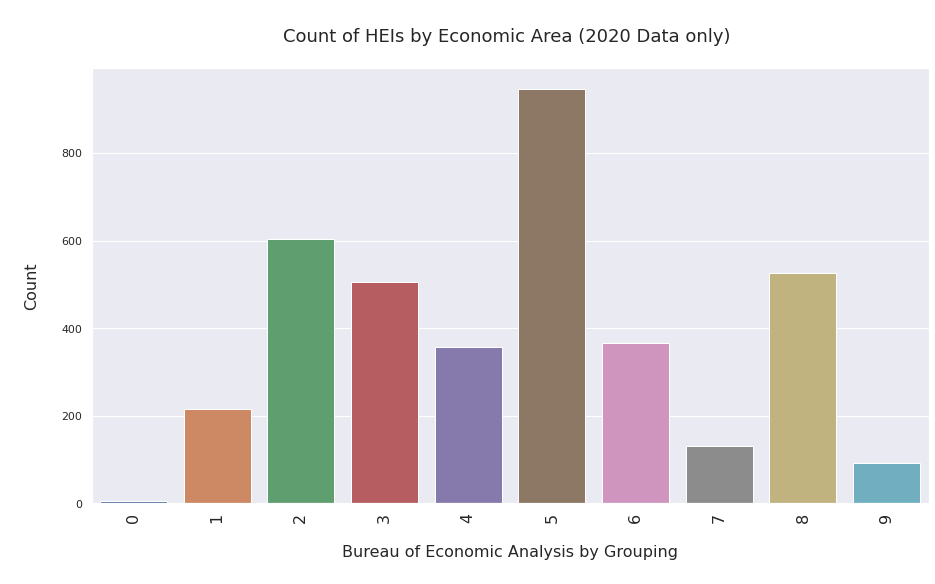

<Figure size 864x648 with 0 Axes>

In [277]:
# Schools by Bureau of Economic Analysis code (States and territories) 
fig_dims = (15, 8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(df9['OBEREG'].sort_values(ascending=True)) 
plt.xticks(rotation=90, fontsize=16)
plt.xlabel('\nBureau of Economic Analysis by Grouping\n', fontsize=16)
plt.ylabel('\nCount\n', fontsize=16)
plt.title('\nCount of HEIs by Economic Area (2020 Data only) \n', fontsize=18)
plt.show()
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/2020_HEIs_by_BEA_Grouping.png")

In [278]:
# df9a.columns

## The distribution of the short-listed institutions by Economic Area is not balanced 

## Interestingly the most numerous area is represented by the SOuth-Eastern block of States 



## NOTE that Military Schools are identified with code 0 separately from the rest -  There are 5 in this df at the moment  that are institutions currently open and granting degrees

## Only one located in MD  

In [279]:

df9.loc[lambda df9:(df9['OBEREG']==0),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,POSTSEC,INSTCAT,INSTSIZE
572,128328,United States Air Force Academy,CO,0,5,2,30,2,31,1,2,2
620,130624,United States Coast Guard Academy,CT,0,5,2,30,2,13,1,2,2
1449,164155,United States Naval Academy,MD,0,5,2,30,2,21,1,2,2
2365,197027,United States Merchant Marine Academy,NY,0,7,1,20,2,21,1,2,2
2366,197036,United States Military Academy,NY,0,5,2,30,2,31,1,2,2


# What is the distribution of these shortlisted institutions by State?

In [280]:
# Checking the number of institutions by State - to take  alook at the data 

df9['STABBR'].value_counts()

CA    362
NY    273
TX    225
PA    176
FL    168
OH    157
IL    137
NC    130
GA    107
VA    101
MA     98
MO     85
MI     84
NJ     84
PR     82
MN     78
TN     77
WA     69
IN     66
SC     64
WI     62
KS     62
AL     62
CO     58
AZ     58
KY     56
LA     55
IA     54
AR     53
MD     52
OR     50
OK     47
WV     40
CT     40
NE     36
NM     36
MS     33
ME     28
UT     26
MT     24
SD     22
NH     22
NV     21
ND     20
HI     16
VT     16
ID     15
RI     13
DC     13
WY      9
AK      8
DE      8
GU      3
AS      1
MP      1
FM      1
PW      1
VI      1
MH      1
Name: STABBR, dtype: int64

In [281]:
# The data currently includes institutions located in US Territories such as Guam etc. 
df9['STABBR'].nunique()

59

In [282]:
df9['STABBR'].unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'MO',
       'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


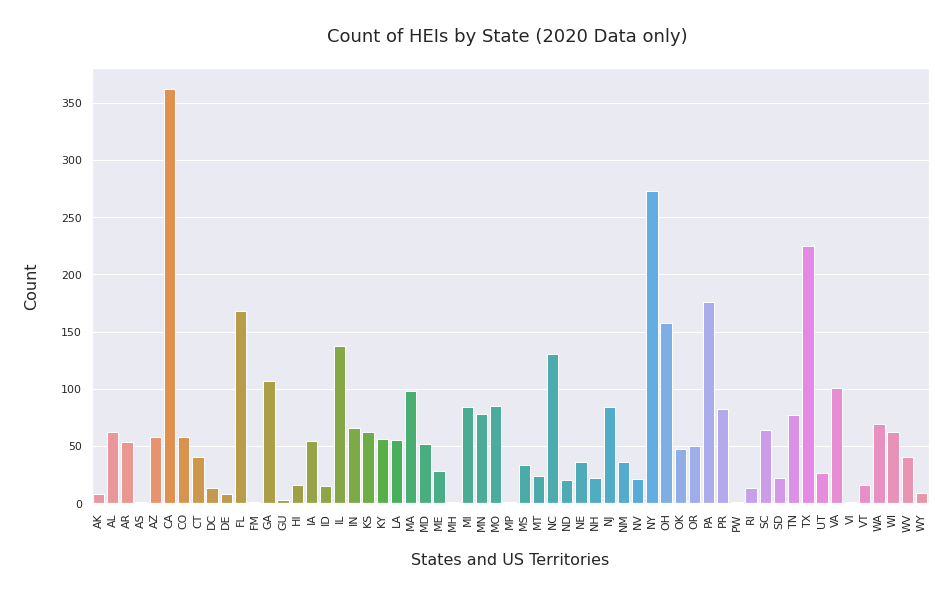

In [283]:
# Schools distribution by State (States are in Alphabetical order - including territories) 
fig_dims = (15, 8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(df9['STABBR'].sort_values(ascending=True)) 
plt.xticks(rotation=90)
plt.xlabel('\nStates and US Territories\n', fontsize=16)
plt.ylabel('\nCount\n', fontsize=16)
plt.title('\nCount of HEIs by State (2020 Data only) \n', fontsize=18)
plt.show()



# What is the distribution of these shortlisted institutions by location (ie whether they are located in urban versus suburban vs rural areas)?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


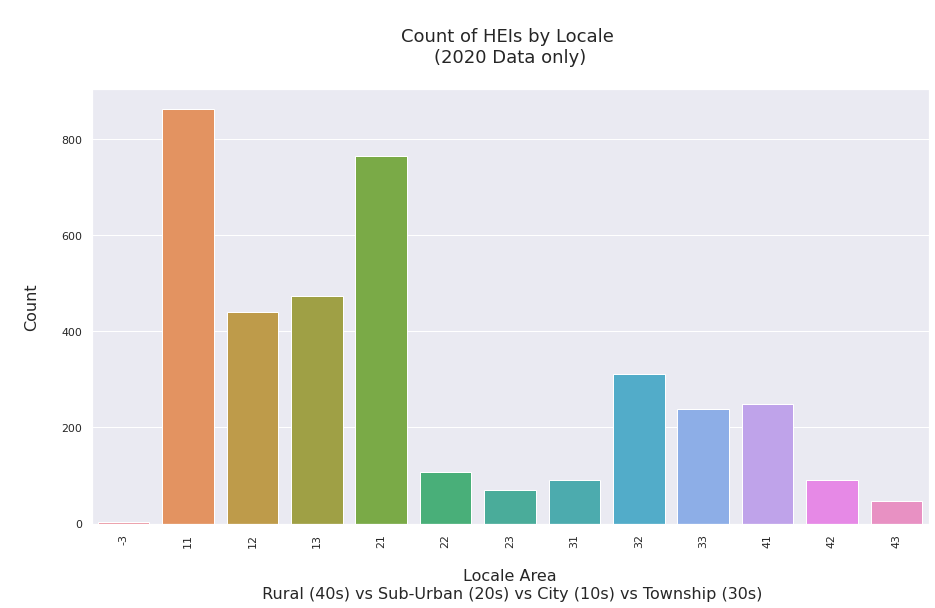

In [284]:
# Schools distribution by Local Characteristics (urban vs rural etc.) 
fig_dims = (15, 8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(df9['LOCALE'].sort_values(ascending=True)) 
plt.xticks(rotation=90)
plt.xlabel('\nLocale Area\n Rural (40s) vs Sub-Urban (20s) vs City (10s) vs Township (30s)', fontsize=16)
plt.ylabel('\nCount\n', fontsize=16)
plt.title('\nCount of HEIs by Locale \n(2020 Data only)\n', fontsize=18)
plt.show()

# # Local Characteristics

# -3 = Not applicable (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the Virgin Islands,  
#      were not assigned a locale code because the geographic and 
#      governmental structures of these entities do not fit the definitional scheme used to derive the code.)

# 11 = City: Large: Territory inside an urbanized area and inside a principal city with population of 250,000 or more. 

# 12 = City: Midsize: Territory inside an urbanized area and inside a principal city with population less than 250,000 and greater than or equal to 100,000.

# 13 = City: Small: Territory inside an urbanized area and inside a principal city with population less than 100,000.

# 21 = Suburb: Large: Territory outside a principal city and inside an urbanized area with population of 250,000 or more.

# 22 = Suburb: Midsize: Territory outside a principal city and inside an urbanized area with population less than 250,000 and greater than or equal to 100,000.

# 23 = Suburb: Small: Territory outside a principal city and inside an urbanized area with population less than 100,000.

# 31 = Town: Fringe: Territory inside an urban cluster that is less than or equal to 10 miles from an urbanized area.

# 32 = Town: Distant: Territory inside an urban cluster that is more than 10 miles and less than or equal to 35 miles from an urbanized area.

# 33 = Town: Remote: Territory inside an urban cluster that is more than 35 miles of an urbanized area.

# 41 - Rural: Fringe: Census-defined rural territory that is less than or equal to 5 miles from an urbanized area, as well as rural territory that is less than or equal to 2.5 miles from an urban cluster. 

# 42 = Rural: Distant: Census-defined rural territory that is more than 5 miles but less than or equal to 25 miles from an urbanized area, as well as rural territory that is more than 2.5 miles but less than or equal to 10 miles from an urban cluster. 

# 43 = Rural: Remote: Census-defined rural territory that is more than 25 miles from an urbanized area and is also more than 10 miles from an urban cluster.


In [285]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 6316
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    3747 non-null   int64 
 1   INSTNM    3747 non-null   object
 2   STABBR    3747 non-null   object
 3   OBEREG    3747 non-null   int64 
 4   HLOFFER   3747 non-null   int64 
 5   GROFFER   3747 non-null   int64 
 6   HDEGOFR1  3747 non-null   int64 
 7   HBCU      3747 non-null   int64 
 8   LOCALE    3747 non-null   int64 
 9   POSTSEC   3747 non-null   int64 
 10  INSTCAT   3747 non-null   int64 
 11  INSTSIZE  3747 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 380.6+ KB


In [286]:
# Due to other EDA I realize that it is convenient for me to rename this column now 
# HDEGOFFR   
df9a=df9.rename(columns={"HDEGOFR1": "HDEGOFFR"})

In [287]:
df9a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 6316
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    3747 non-null   int64 
 1   INSTNM    3747 non-null   object
 2   STABBR    3747 non-null   object
 3   OBEREG    3747 non-null   int64 
 4   HLOFFER   3747 non-null   int64 
 5   GROFFER   3747 non-null   int64 
 6   HDEGOFFR  3747 non-null   int64 
 7   HBCU      3747 non-null   int64 
 8   LOCALE    3747 non-null   int64 
 9   POSTSEC   3747 non-null   int64 
 10  INSTCAT   3747 non-null   int64 
 11  INSTSIZE  3747 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 380.6+ KB


In [288]:
df9a.shape

(3747, 12)

In [289]:
# Finally checking for null values 
df9a.isnull().sum()

UNITID      0
INSTNM      0
STABBR      0
OBEREG      0
HLOFFER     0
GROFFER     0
HDEGOFFR    0
HBCU        0
LOCALE      0
POSTSEC     0
INSTCAT     0
INSTSIZE    0
dtype: int64

In [290]:
df9a.isna().sum()

UNITID      0
INSTNM      0
STABBR      0
OBEREG      0
HLOFFER     0
GROFFER     0
HDEGOFFR    0
HBCU        0
LOCALE      0
POSTSEC     0
INSTCAT     0
INSTSIZE    0
dtype: int64

In [291]:
df9a.reset_index()

# df9a.drop(['index'], axis =1, inplace = True)
# df9=df8.copy(deep=False)

,index,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,POSTSEC,INSTCAT,INSTSIZE
0,0,100654,Alabama A & M University,AL,5,9,1,12,1,12,1,2,3
1,1,100663,University of Alabama at Birmingham,AL,5,9,1,11,2,12,1,2,5
2,2,100690,Amridge University,AL,5,9,1,12,2,12,1,2,1
3,3,100706,University of Alabama in Huntsville,AL,5,9,1,11,2,12,1,2,3
4,4,100724,Alabama State University,AL,5,9,1,11,1,12,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,6310,494755,West Virginia Junior College-United Career Ins...,PA,2,3,2,40,2,21,1,4,1
3743,6312,494807,Ponce Health Sciences University-East,PR,9,9,1,12,2,12,1,2,1
3744,6314,494843,Fortis College-Landover,MD,2,3,2,40,2,21,1,4,1
3745,6315,494852,Stautzenberger College-Rockford Career College,IL,3,3,2,40,2,12,1,4,1


In [292]:
# df9a.columns

In [293]:
# df9.info()

In [294]:
# df9a.head()

The UNITID column of this first cleaned dataframe is going to be the short list of institutions we will look to aggregate information for based on the other publicly available information posted by IPEDS.

In [295]:
# # Institutions short listed - These include institutions from all States including undergraduate degrees

hd_unitid_name_list=df9a[['UNITID','INSTNM']]

hd_unitid_name_list.shape

(3747, 2)

In [296]:
hd_unitid_name_list.to_csv("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/unitid_name.csv")

In [297]:
# df9a.set_index('UNITID')

# **Second  Data File**

## This second File made available by IPDES and it includes information pertaining to "Educational offerings, organization, services and athletic associations". 

## We will shortlist and identify features that will be part of our further analysis. - In order to do so, a first analysis will take place on the Dictionary File accompanying the Data File where  descriptive information for each variable is recorded.  

NOTE: The dictionary for this file is included in the data folder. 

In [298]:
df_ic = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/ic2020.csv')
# df = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/hd2019.csv')
df_ic.head()

0.10952520370483398 seconds


,UNITID,PEO1ISTR,PEO2ISTR,PEO3ISTR,PEO4ISTR,PEO5ISTR,PEO6ISTR,CNTLAFFI,PUBPRIME,PUBSECON,...,ASSOC5,ASSOC6,SPORT1,CONFNO1,SPORT2,CONFNO2,SPORT3,CONFNO3,SPORT4,CONFNO4
0,100654,0,1,0,0,0,0,1,2,0,...,0,0,1,133,1,133,1,133,1,133
1,100663,0,1,1,0,0,0,1,2,0,...,0,0,1,111,1,111,1,111,1,111
2,100690,0,1,0,0,0,0,4,-2,-2,...,0,0,2,-2,2,-2,2,-2,2,-2
3,100706,0,1,1,1,0,0,1,2,0,...,0,0,2,-2,1,146,1,146,1,146
4,100724,1,1,0,0,0,1,1,2,0,...,0,0,1,133,1,133,1,133,1,133


In [299]:
df_ic.shape

(6264, 123)

### After careful analysis of the 123 variables included in the file I have shortlisted the following 45 variables to extyract from the DF - this short-list of variables will be further analyzed and polished.

	Var_Name	Description
1	UNITID	Unique identification number of the institution

2	PEO2ISTR	Academic

3	CNTLAFFI	Institutional control or affiliation

4	LEVEL3	Associate's degree

5	LEVEL5	Bachelor's degree

6	CALSYS	Calendar system

7	FT_UG	Full-time undergraduate students are enrolled

8	FT_FTUG	Full time first-time degree/certificate-seeking undergraduate students enrolled

9	PT_UG	Part-time undergraduate students are enrolled

10	PT_FTUG	Part time first-time degree/certificate-seeking undergraduate students enrolled

11	OPENADMP	Open admission policy

12	VET1	Yellow Ribbon Program (officially known as Post-9/11 GI Bill, Yellow Ribbon Program)

13	VET2	Credit for military training

14	CREDITS1	Dual enrollment

15	CREDITS2	Credit for life experiences

16	CREDITS3	Advanced placement (AP) credits

17	CREDITS4	Institution does not accept dual, credit for life, or AP credits

18	SLO5	ROTC

19	SLO6	Study abroad

20	SLO7	Weekend/evening  college

21	SLO83	Teacher certification: Approved by the state for initial certifcation or licensure of teachers.

22	YRSCOLL	Years of college-level work required

23	STUSRV1	Remedial services

24	STUSRV2	Academic/career counseling service

25	STUSRV3	Employment services for students

26	STUSRV4	Placement services for completers

27	STUSRV8	On-campus day care for students' children

28	STUSRV9	None of the above selected services are offered

29	LIBRES1	Library resources/services: Physical facilities

30	TUITPL	Any alternative tuition plans offered by institution

31	TUITPL1	Tuition guaranteed plan

32	TUITPL2	Prepaid tuition plan

33	TUITPL3	Tuition payment plan

34	TUITPL4	Other alternative tuition plan

35	DSTNUGC	Undergraduate level distance education courses offered

36	DSTNUGP	Undergraduate level distance education programs offered

37	DSTNCED1	Undergraduate level programs or courses are offered via distance education

38	ALLONCAM	Full-time, first-time degree/certificate-seeking students required to live on campus

39	TUITVARY	Tuition charge varies for in-district, in-state, out-of-state students

40	ROOM	Institution provide on-campus housing

41	BOARD	Institution provides board or meal plan

42	ROOMAMT	Typical room charge for academic year

43	BOARDAMT	Typical board charge for academic year

44	RMBRDAMT	Combined charge for room and board

45	APPLFEEU	Undergraduate application fee

In addition the following variables will also be added to the df because they indicate whether the information shared by the HEI was self reported of not:
XROOMAMT
ROOMAMT
XBORDAMT
BOARDAMT
XRMBDAMT
RMBRDAMT
XAPPFEEU


In [300]:
# columns=['UNITID','PEO2ISTR','CNTLAFFI','LEVEL3','LEVEL5','CALSYS','FT_UG','FT_FTUG','PT_UG',
        #  'PT_FTUG','OPENADMP','VET1','VET2','CREDITS1','CREDITS2','CREDITS3','CREDITS4','SLO5',
        #  'SLO6','SLO7','SLO83','YRSCOLL','STUSRV1','STUSRV2','STUSRV3','STUSRV4','STUSRV8','STUSRV9','LIBRES1','TUITPL','TUITPL1','TUITPL2','TUITPL3',
        #  'TUITPL4','DSTNUGC','DSTNUGP','DSTNCED1','ALLONCAM','TUITVARY','ROOM','BOARD','ROOMAMT','BOARDAMT','RMBRDAMT','APPLFEEU']


df_ic = df_ic[['UNITID','PEO2ISTR','CNTLAFFI','LEVEL3','LEVEL5','CALSYS','FT_UG','FT_FTUG','PT_UG',
         'PT_FTUG','OPENADMP','VET1','VET2','CREDITS1','CREDITS2','CREDITS3','CREDITS4','SLO5',
         'SLO6','SLO7','SLO83','YRSCOLL','STUSRV1','STUSRV2','STUSRV3','STUSRV4','STUSRV8',
         'STUSRV9','LIBRES1','TUITPL','TUITPL1','TUITPL2','TUITPL3','TUITPL4','DSTNUGC',
         'DSTNUGP','DSTNCED1','ALLONCAM','TUITVARY','ROOM','BOARD',
         'ROOMAMT','XROOMAMT','BOARDAMT','XBORDAMT','RMBRDAMT','XRMBDAMT','APPLFEEU','XAPPFEEU']].reset_index(drop=True)

In [301]:
df_ic.head()

,UNITID,PEO2ISTR,CNTLAFFI,LEVEL3,LEVEL5,CALSYS,FT_UG,FT_FTUG,PT_UG,PT_FTUG,...,ROOM,BOARD,ROOMAMT,XROOMAMT,BOARDAMT,XBORDAMT,RMBRDAMT,XRMBDAMT,APPLFEEU,XAPPFEEU
0,100654,1,1,0,1,1,1,1,1,1,...,1,1,3682,R,3840,R,.,A,30,R
1,100663,1,1,0,1,1,1,1,1,1,...,1,2,7767,R,4540,R,.,A,40,R
2,100690,1,4,1,1,1,1,1,1,2,...,2,3,.,A,.,A,.,A,50,R
3,100706,1,1,0,1,1,1,1,1,1,...,1,1,.,A,.,A,10652,R,30,R
4,100724,1,1,0,1,1,1,1,1,1,...,1,1,3500,R,2550,R,.,A,25,R


In [302]:
# This variable indicates whether the institution is an Academic instituion (ie whether it offers a degree leading to a certificate or diploma)

# We are going to eliminate any institution not academic in nature as they fall beyond the scope of our analysis 

df_ic['PEO2ISTR'].value_counts()

1    4349
0    1915
Name: PEO2ISTR, dtype: int64

In [303]:
df_ic1= df_ic.loc[lambda df_ic:(df_ic['PEO2ISTR']==1),:]
df_ic1.drop(['PEO2ISTR'], axis =1, inplace = True)
df_ic1a = df_ic1.copy(deep=False)

# df8.drop(['UGOFFER'], axis =1, inplace = True)
# df9=df8.copy(deep=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [304]:
# df_ic1.isnull().sum()

In [305]:
# df_ic1.isna().sum()

In [306]:
df_ic1a.head()

,UNITID,CNTLAFFI,LEVEL3,LEVEL5,CALSYS,FT_UG,FT_FTUG,PT_UG,PT_FTUG,OPENADMP,...,ROOM,BOARD,ROOMAMT,XROOMAMT,BOARDAMT,XBORDAMT,RMBRDAMT,XRMBDAMT,APPLFEEU,XAPPFEEU
0,100654,1,0,1,1,1,1,1,1,2,...,1,1,3682,R,3840,R,.,A,30,R
1,100663,1,0,1,1,1,1,1,1,2,...,1,2,7767,R,4540,R,.,A,40,R
2,100690,4,1,1,1,1,1,1,2,1,...,2,3,.,A,.,A,.,A,50,R
3,100706,1,0,1,1,1,1,1,1,2,...,1,1,.,A,.,A,10652,R,30,R
4,100724,1,0,1,1,1,1,1,1,2,...,1,1,3500,R,2550,R,.,A,25,R


In [307]:
df_ic1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 0 to 6260
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    4349 non-null   int64 
 1   CNTLAFFI  4349 non-null   int64 
 2   LEVEL3    4349 non-null   int64 
 3   LEVEL5    4349 non-null   int64 
 4   CALSYS    4349 non-null   int64 
 5   FT_UG     4349 non-null   int64 
 6   FT_FTUG   4349 non-null   int64 
 7   PT_UG     4349 non-null   int64 
 8   PT_FTUG   4349 non-null   int64 
 9   OPENADMP  4349 non-null   int64 
 10  VET1      4349 non-null   int64 
 11  VET2      4349 non-null   int64 
 12  CREDITS1  4349 non-null   int64 
 13  CREDITS2  4349 non-null   int64 
 14  CREDITS3  4349 non-null   int64 
 15  CREDITS4  4349 non-null   int64 
 16  SLO5      4349 non-null   int64 
 17  SLO6      4349 non-null   int64 
 18  SLO7      4349 non-null   int64 
 19  SLO83     4349 non-null   int64 
 20  YRSCOLL   4349 non-null   int64 
 21  STUSRV1   4349

In [308]:
df_ic1a['ROOM'].unique()

array([ 1,  2, -2, -1])

In [309]:
df_ic1a['ROOM'].value_counts()

# CODE: 
# 1	Yes
# 2	No
# -1	Not reported
# -2	Not applicable



 2    2189
 1    2083
-2      72
-1       5
Name: ROOM, dtype: int64

### The institutions who did not report whether they offer Undergraduates ROOMs and those who stated that they did not have rooms by stating that the question was not applicable will be added to the group of those not offering Room service to students. 

In [310]:
df_ic1a['ROOM'].replace({-1:2, -2:2}, inplace=True)
df_ic1a['ROOM'].value_counts()



2    2266
1    2083
Name: ROOM, dtype: int64

In [311]:
df_ic1a['BOARD'].unique()

array([ 1,  2,  3, -2, -1])

In [312]:
df_ic1a['BOARD'].value_counts()

# # CODE: 
# 1	Yes, number of meals in the maximum meal plan offered
# 2	Yes, number of meals per week can vary
# 3	No
# -1	Not reported
# -2	Not applicable



 3    2394
 1    1091
 2     787
-2      72
-1       5
Name: BOARD, dtype: int64

In [313]:
# I will merge the institutions offering different meal plans into one category of Offering Meal Plans HEIs.

# Furthermore, for the HEIs either not offering Boarding services or who did not report or who selected not applicable will also be merged into one  category "Not Offering Board"

df_ic1a['BOARD'].replace({2:1, 3:2, -1:2, -2:2}, inplace=True)
df_ic1a['BOARD'].value_counts()


2    2471
1    1878
Name: BOARD, dtype: int64

In [314]:
# Taking a look at the Room Cost column
df_ic1a['ROOMAMT'].unique()

array(['3682', '7767', '.', ..., '3040', '2160', '5973'], dtype=object)

In [315]:
# df_ic1a.loc[lambda df_ic1a:((df_ic1a['ROOM']==2) & (df_ic1a['RMBRDAMT']=='.')),:]
# df_ic1a.loc[lambda df_ic1a:(df_ic1a['ROOM']==2),:]
# df_ic1a.loc[lambda df_ic1a:(df_ic1a['RMBRDAMT']=='.'),:]
# & )

In [316]:
df_ic1a['XROOMAMT'].unique()
 
# # NOTE:
# 
# A	Not applicable
# B	Institution left item blank
# C	Analyst corrected reported value
# R	Reported



array(['R', 'A', 'C', 'B'], dtype=object)

In [317]:
df_ic1a['XROOMAMT'].value_counts()

# There is a discrepancy in terms of the number of Institutions who Reported the ROOM fees amount (1650) PLUS Analyst Corrected amounts (6) 
# and those who have Rooms available to undergraduate students (2083) - 
#The discrepancy amounts to 427 total institutions

# Taking  into consideration the institutions who reported the costs of Room and Board aggregately (424) PLUS the reported values corrected by Analysts in the same category (1)
# The total discrepancy goes down to Only 2 institutions  

A    2688
R    1650
C       6
B       5
Name: XROOMAMT, dtype: int64

In [318]:
df_ic1a['XRMBDAMT'].value_counts()
# # NOTE:
# 
# A	Not applicable
# B	Institution left item blank
# C	Analyst corrected reported value
# R	Reported

A    3919
R     424
B       5
C       1
Name: XRMBDAMT, dtype: int64

In [319]:
df_ic1a.head()

,UNITID,CNTLAFFI,LEVEL3,LEVEL5,CALSYS,FT_UG,FT_FTUG,PT_UG,PT_FTUG,OPENADMP,...,ROOM,BOARD,ROOMAMT,XROOMAMT,BOARDAMT,XBORDAMT,RMBRDAMT,XRMBDAMT,APPLFEEU,XAPPFEEU
0,100654,1,0,1,1,1,1,1,1,2,...,1,1,3682,R,3840,R,.,A,30,R
1,100663,1,0,1,1,1,1,1,1,2,...,1,1,7767,R,4540,R,.,A,40,R
2,100690,4,1,1,1,1,1,1,2,1,...,2,2,.,A,.,A,.,A,50,R
3,100706,1,0,1,1,1,1,1,1,2,...,1,1,.,A,.,A,10652,R,30,R
4,100724,1,0,1,1,1,1,1,1,2,...,1,1,3500,R,2550,R,.,A,25,R


In [320]:
# # # Checking if all of the Not Applicable values in the ROOM Amount Column are those recorded with a '.' in the df  - Which is true

# filter_df_ic1a = df_ic1a[(df_ic1a['XROOMAMT']=='A')& (df_ic1a['ROOMAMT']!='.')]

# filter_df_ic1a

In [321]:
# # Checking if all of the Not Applicable valuesin the BOARD AMOUNT COlumn are those recorded with a '.' in the df  - Which is true

# filter_df_ic1a_BRD = df_ic1a[(df_ic1a['XBORDAMT']=='A')& (df_ic1a['BOARDAMT']!='.')]

# filter_df_ic1a_BRD

In [322]:
# # Checking if all of the Not Applicable valuesin the ROOM AND BOARD AMOUNTs COlumn are those recorded with a '.' in the df  - Which is true

# filter_df_ic1a_RMandBRD = df_ic1a[(df_ic1a['XRMBDAMT']=='A')& (df_ic1a['RMBRDAMT']!='.')]

# filter_df_ic1a_RMandBRD

In [323]:
# # Taking a look at the Room and Board Column (aggregate - the institution did not provide a breakdown of the costs here)
# df_ic1a['RMBRDAMT'].unique()

In [324]:
df_ic1a['RMBRDAMT']=df_ic1a['RMBRDAMT'].str.replace(".",'0').str.replace(' ','')
df_ic1a['ROOMAMT']=df_ic1a['ROOMAMT'].str.replace(".",'0').str.replace(' ','')
df_ic1a['BOARDAMT']=df_ic1a['BOARDAMT'].str.replace(".",'0').str.replace(' ','')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:

# # Casting the Room and Board and Room&Board columns to integer typeto check their stats and decide on how to handle the data that was not separately reported


df_ic1a['RMBRDAMT']=df_ic1a['RMBRDAMT'].astype(int)
df_ic1a['ROOMAMT']=df_ic1a['ROOMAMT'].astype(int)
df_ic1a['BOARDAMT']=df_ic1a['BOARDAMT'].astype(int)



In [326]:
df_ic1a['RMANDBRDAMT']=df_ic1a['RMBRDAMT']+df_ic1a['ROOMAMT']+df_ic1a['BOARDAMT']
df_ic1a.drop(['ROOMAMT','XROOMAMT','BOARDAMT','XBORDAMT','RMBRDAMT','XRMBDAMT'], axis =1, inplace = True)  	
df_ic1a.head()

,UNITID,CNTLAFFI,LEVEL3,LEVEL5,CALSYS,FT_UG,FT_FTUG,PT_UG,PT_FTUG,OPENADMP,...,DSTNUGC,DSTNUGP,DSTNCED1,ALLONCAM,TUITVARY,ROOM,BOARD,APPLFEEU,XAPPFEEU,RMANDBRDAMT
0,100654,1,0,1,1,1,1,1,1,2,...,1,1,1,2,1,1,1,30,R,7522
1,100663,1,0,1,1,1,1,1,1,2,...,1,1,1,2,1,1,1,40,R,12307
2,100690,4,1,1,1,1,1,1,2,1,...,1,1,1,2,2,2,2,50,R,0
3,100706,1,0,1,1,1,1,1,1,2,...,1,1,1,2,1,1,1,30,R,10652
4,100724,1,0,1,1,1,1,1,1,2,...,1,1,1,2,1,1,1,25,R,6050


In [327]:
# Taking a look at the application fee for undergraduate students 
df_ic1a['APPLFEEU'].unique()

array(['30', '40', '50', '25', '.', '0', '35', '20', '70', '100', '10',
       '90', '45', '65', '75', '150', '95', '60', '55', '110', '99', '85',
       '250', '80', '15', '36', '125', '175', '5', '42', '200', '52',
       '41', '74', '300', '56', '260', '130', '120', '115', '49', '32',
       '275', '140'], dtype=object)

In [328]:
df_ic1a['XAPPFEEU'].unique()

# # NOTE:
# 
# A	Not applicable
# B	Institution left item blank
# R	Reported

array(['R', 'A', 'B'], dtype=object)

In [329]:
# Taking a look at the last column in th df which represents the application fee for undergraduate students 
df_ic1a['APPLFEEU'].value_counts()

0      1928
50      448
.       361
25      331
30      192
100     153
35      132
40      129
20      120
75       84
60       75
70       71
65       70
45       44
15       29
55       28
10       26
150      25
80       22
95       20
85       11
125       8
49        7
110       4
90        4
200       4
52        2
42        2
250       2
5         2
175       2
36        1
41        1
74        1
300       1
56        1
260       1
130       1
120       1
115       1
99        1
32        1
275       1
140       1
Name: APPLFEEU, dtype: int64

In [330]:
df_ic1a['XAPPFEEU'].value_counts()

# Looking at the Non reported values together with the Non-Applicable values we see that their sum is equal to the values filled in with "." in the Fee Amount column
# This being the case I can go ahead and fill in the "." with zeros without inserting errors
# and then I can drop the 'XAPPFEEU' column as it does not add any useful information at this point. 


R    3988
A     356
B       5
Name: XAPPFEEU, dtype: int64

In [331]:
df_ic1a['APPLFEEU']=df_ic1a['APPLFEEU'].str.replace(".",'0')

df_ic1a.drop(['XAPPFEEU'], axis =1, inplace = True)  	
df_ic1a.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,UNITID,CNTLAFFI,LEVEL3,LEVEL5,CALSYS,FT_UG,FT_FTUG,PT_UG,PT_FTUG,OPENADMP,...,TUITPL4,DSTNUGC,DSTNUGP,DSTNCED1,ALLONCAM,TUITVARY,ROOM,BOARD,APPLFEEU,RMANDBRDAMT
0,100654,1,0,1,1,1,1,1,1,2,...,0,1,1,1,2,1,1,1,30,7522
1,100663,1,0,1,1,1,1,1,1,2,...,0,1,1,1,2,1,1,1,40,12307
2,100690,4,1,1,1,1,1,1,2,1,...,0,1,1,1,2,2,2,2,50,0
3,100706,1,0,1,1,1,1,1,1,2,...,0,1,1,1,2,1,1,1,30,10652
4,100724,1,0,1,1,1,1,1,1,2,...,0,1,1,1,2,1,1,1,25,6050


In [332]:
df_ic1a['APPLFEEU'].value_counts()

0      2289
50      448
25      331
30      192
100     153
35      132
40      129
20      120
75       84
60       75
70       71
65       70
45       44
15       29
55       28
10       26
150      25
80       22
95       20
85       11
125       8
49        7
110       4
90        4
200       4
52        2
42        2
250       2
5         2
175       2
36        1
41        1
74        1
300       1
56        1
260       1
130       1
120       1
115       1
99        1
32        1
275       1
140       1
Name: APPLFEEU, dtype: int64

In [333]:
# # Checking data types 
# df_ic1a.info()

In [334]:
# Finally let's cast "APPLFEEU" as integer type 
df_ic1a['APPLFEEU']=df_ic1a['APPLFEEU'].astype(int)
# df_ic1a.info()

# Ready to merge the first two dataframes. 

## I will merge the dataframes 

In [335]:
df_ic1a.shape

(4349, 42)

In [336]:
# df_ic1a['UNITID'].unique()

In [337]:
df_ic1a.columns

Index(['UNITID', 'CNTLAFFI', 'LEVEL3', 'LEVEL5', 'CALSYS', 'FT_UG', 'FT_FTUG',
       'PT_UG', 'PT_FTUG', 'OPENADMP', 'VET1', 'VET2', 'CREDITS1', 'CREDITS2',
       'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'YRSCOLL',
       'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'STUSRV9',
       'LIBRES1', 'TUITPL', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4',
       'DSTNUGC', 'DSTNUGP', 'DSTNCED1', 'ALLONCAM', 'TUITVARY', 'ROOM',
       'BOARD', 'APPLFEEU', 'RMANDBRDAMT'],
      dtype='object')

In [338]:
df9a.shape

(3747, 12)

In [339]:
# df9a['UNITID'].unique()

In [340]:
df9a.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'OBEREG', 'HLOFFER', 'GROFFER',
       'HDEGOFFR', 'HBCU', 'LOCALE', 'POSTSEC', 'INSTCAT', 'INSTSIZE'],
      dtype='object')

### Taking a look at the DFs we can immediately see that there is a difference in size - This implies that we have data in our second DF we did not keep in our first df 

### The first data frame included the short list of all HEIs that offered Undegraduate degrees and that were still open in 2020. - I will merge the second df keeping the same Institution IDs short-listed in our first DF   

In [341]:
df_merged = pd.merge(df9a, df_ic1a, left_on='UNITID', right_on='UNITID')
df_merged.shape

(3553, 53)

In [342]:
df_merged.head()

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,POSTSEC,...,TUITPL4,DSTNUGC,DSTNUGP,DSTNCED1,ALLONCAM,TUITVARY,ROOM,BOARD,APPLFEEU,RMANDBRDAMT
0,100654,Alabama A & M University,AL,5,9,1,12,1,12,1,...,0,1,1,1,2,1,1,1,30,7522
1,100663,University of Alabama at Birmingham,AL,5,9,1,11,2,12,1,...,0,1,1,1,2,1,1,1,40,12307
2,100690,Amridge University,AL,5,9,1,12,2,12,1,...,0,1,1,1,2,2,2,2,50,0
3,100706,University of Alabama in Huntsville,AL,5,9,1,11,2,12,1,...,0,1,1,1,2,1,1,1,30,10652
4,100724,Alabama State University,AL,5,9,1,11,1,12,1,...,0,1,1,1,2,1,1,1,25,6050


In [343]:
df_merged['STABBR'].nunique()

59

In [344]:
df_merged['OPENADMP'].unique()

# CODE MEANING for Open Admission Policy
# 1	Yes
# 2	No
# -2	Not applicable

# Open Admission or open enrollment, is a type of unselective and noncompetitive college admissions process in the United States
#  in which the only criterion for entrance is a high school diploma or a certificate of attendance or General Educational Development (GED) certificate

# https://en.wikipedia.org/wiki/Open_admissions 


array([ 2,  1, -2])

In [345]:
df_merged['OPENADMP'].value_counts()

# There is a fairly even split of the number of institutions adopting open enrollment and those who do not 

 2    1835
 1    1621
-2      97
Name: OPENADMP, dtype: int64

In [346]:
df_merged['CNTLAFFI'].value_counts()

# CODE MEANING for CNTLAFFI which represents the Institution's control (whether public or private)
# 1	Public
# 2	Private for-profit
# 3	Private not-for-profit (no religious affiliation)
# 4	Private not-for-profit (religious affiliation)


1    1588
4     783
3     678
2     504
Name: CNTLAFFI, dtype: int64

In [347]:
# Taking a look at Institutions without Open Admissions and located in Maryland

df_merged.loc[lambda df_merged:((df_merged['OPENADMP']==2)&(df_merged['STABBR']=='MD')),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,POSTSEC,...,TUITPL4,DSTNUGC,DSTNUGP,DSTNCED1,ALLONCAM,TUITVARY,ROOM,BOARD,APPLFEEU,RMANDBRDAMT
1014,161873,University of Baltimore,MD,2,9,1,11,2,11,1,...,1,1,1,1,2,1,2,2,35,0
1015,162007,Bowie State University,MD,2,9,1,12,1,21,1,...,0,1,0,1,2,1,1,1,40,12336
1016,162061,Capitol Technology University,MD,2,9,1,12,2,21,1,...,0,1,0,1,2,2,1,2,25,7090
1020,162210,Washington Adventist University,MD,2,7,1,20,2,21,1,...,0,1,0,1,2,2,1,1,25,9830
1021,162283,Coppin State University,MD,2,9,1,13,1,11,1,...,0,1,1,1,2,1,1,1,50,10655
1023,162584,Frostburg State University,MD,2,9,1,12,2,23,1,...,1,1,1,1,2,1,1,1,45,11084
1025,162654,Goucher College,MD,2,8,1,20,2,13,1,...,0,1,1,1,2,2,1,1,55,14716
1028,162760,Hood College,MD,2,9,1,12,2,13,1,...,0,1,0,1,2,2,1,1,0,13010
1030,162928,Johns Hopkins University,MD,2,9,1,11,2,11,1,...,0,1,0,1,2,2,1,1,70,11095
1032,163046,Loyola University Maryland,MD,2,9,1,11,2,11,1,...,0,1,0,1,2,2,1,1,60,16490


In [348]:

# Taking a quick look at the Institutions not reporting their enrollment policy 
df_merged_no_enrol_pol = df_merged.loc[lambda df_merged:(df_merged['OPENADMP']==-2),:]

In [349]:
# Taking a closer look at the control status of the institutions not disclosing their enrollment policy 
df_merged_no_enrol_pol['CNTLAFFI'].value_counts()

# CODE MEANING for CNTLAFFI which represents the Institution's control (whether public or private)
# 1	Public
# 2	Private for-profit
# 3	Private not-for-profit (no religious affiliation)
# 4	Private not-for-profit (religious affiliation)

3    43
1    21
2    18
4    15
Name: CNTLAFFI, dtype: int64

Interestingly there are some public institutions not reporting their enrollment policy. 

In [350]:
df_merged_no_enrol_pol.loc[lambda df_merged_no_enrol_pol:(df_merged_no_enrol_pol['CNTLAFFI']==1),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,POSTSEC,...,TUITPL4,DSTNUGC,DSTNUGP,DSTNCED1,ALLONCAM,TUITVARY,ROOM,BOARD,APPLFEEU,RMANDBRDAMT
7,100812,Athens State University,AL,5,7,1,20,2,31,1,...,0,1,1,1,-2,1,2,2,30,0
87,106263,University of Arkansas for Medical Sciences,AR,5,9,1,11,2,12,1,...,0,1,1,1,-2,1,1,2,70,7800
254,117803,Los Angeles County College of Nursing and Alli...,CA,8,3,2,40,2,11,1,...,0,0,0,0,-2,2,2,2,0,0
957,159373,Louisiana State University Health Sciences Cen...,LA,5,9,1,11,2,11,1,...,0,0,0,0,-2,1,1,2,50,4356
1034,163259,"University of Maryland, Baltimore",MD,2,9,1,11,2,11,1,...,0,1,1,1,-2,1,1,2,50,8445
1423,181428,University of Nebraska Medical Center,NE,4,9,1,11,2,11,1,...,0,1,1,1,-2,1,2,2,60,0
1734,196255,SUNY Downstate Health Sciences University,NY,2,9,1,11,2,11,1,...,0,1,1,1,-2,1,1,2,50,9410
1737,196307,Upstate Medical University,NY,2,9,1,11,2,12,1,...,0,1,1,1,-2,1,1,2,50,10972
2051,207342,University of Oklahoma-Health Sciences Center,OK,6,9,1,11,2,11,1,...,0,1,1,1,-2,1,1,2,50,5970
2089,209490,Oregon Health & Science University,OR,8,9,1,11,2,11,1,...,0,1,0,1,-2,1,2,2,55,0


In [351]:
# Taking a quick look at the MD Institutions (out of curiosity)

df_merged.loc[lambda df_merged:(df_merged['STABBR']=='MD'),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,POSTSEC,...,TUITPL4,DSTNUGC,DSTNUGP,DSTNCED1,ALLONCAM,TUITVARY,ROOM,BOARD,APPLFEEU,RMANDBRDAMT
1011,161688,Allegany College of Maryland,MD,2,3,2,40,2,13,1,...,0,1,1,1,2,1,1,2,0,6000
1012,161767,Anne Arundel Community College,MD,2,3,2,40,2,21,1,...,0,1,1,1,2,1,2,2,0,0
1013,161864,Baltimore City Community College,MD,2,3,2,40,2,11,1,...,0,1,1,1,2,1,2,2,0,0
1014,161873,University of Baltimore,MD,2,9,1,11,2,11,1,...,1,1,1,1,2,1,2,2,35,0
1015,162007,Bowie State University,MD,2,9,1,12,1,21,1,...,0,1,0,1,2,1,1,1,40,12336
1016,162061,Capitol Technology University,MD,2,9,1,12,2,21,1,...,0,1,0,1,2,2,1,2,25,7090
1017,162104,Cecil College,MD,2,3,2,40,2,41,1,...,0,1,1,1,2,1,2,2,0,0
1018,162122,College of Southern Maryland,MD,2,3,2,40,2,41,1,...,0,1,1,1,2,1,2,2,0,0
1019,162168,Chesapeake College,MD,2,3,2,40,2,42,1,...,0,1,1,1,2,1,2,2,0,0
1020,162210,Washington Adventist University,MD,2,7,1,20,2,21,1,...,0,1,0,1,2,2,1,1,25,9830


In [352]:
# df_merged.loc[lambda df_merged:(df_merged['STABBR']=='VA'),:]

# Third Data File 

## The third data file includes data pertaining to the recorded 12-month unduplicated headcount by race/ethnicity, gender and level of student for the Academic Year 2019-2020.

##NOTE: The data included in this DF repeats for each Institution UNITID  data that is then further disaggregated by student characteristics (for example whether the student is full time or part time or whether the student is degree seeking or not etc. ) 

## **We will be focusing on aggregate levels of Undergraduate students only**

In [353]:
df_effy = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/effy2020.csv')

df_effy.head()

0.9257616996765137 seconds


,UNITID,EFFYALEV,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,...,XEYUNKNM,EFYUNKNM,XEYUNKNW,EFYUNKNW,XEYNRALT,EFYNRALT,XEYNRALM,EFYNRALM,XEYNRALW,EFYNRALW
0,100654,1,1,999,R,6560,R,2527,R,4033,...,R,151,R,330,R,92,R,45,R,47
1,100654,2,2,1,R,5479,R,2193,R,3286,...,R,91,R,160,R,41,R,21,R,20
2,100654,3,-2,1,R,5472,R,2191,R,3281,...,R,90,R,160,R,41,R,21,R,20
3,100654,4,-2,1,R,1753,R,692,R,1061,...,R,31,R,50,R,12,R,5,R,7
4,100654,5,-2,1,R,3719,R,1499,R,2220,...,R,59,R,110,R,29,R,16,R,13


##**First we select only underduate level students**

### The variable indicating the level of study is 'LSTUDY' and the code representing Undergraduates is equal to 1  (Based on the information available in the dictionary accomapnying this data file - Dictionary_effy2020)

In [354]:
df_effy['LSTUDY'].unique()
# # CODES:
# LSTUDY = 1 represents undergraduate students 

# LSTUDY = 3 represents graduate students

# LSTUDY = 999 represents a generated total number of students independently of level of study 

array([999,   1,   3])

In [355]:
df_effy_under = df_effy.loc[lambda df_effy:(df_effy['LSTUDY']==1),:]

df_effy_under.head()

,UNITID,EFFYALEV,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,...,XEYUNKNM,EFYUNKNM,XEYUNKNW,EFYUNKNW,XEYNRALT,EFYNRALT,XEYNRALM,EFYNRALM,XEYNRALW,EFYNRALW
1,100654,2,2,1,R,5479,R,2193,R,3286,...,R,91,R,160,R,41,R,21,R,20
2,100654,3,-2,1,R,5472,R,2191,R,3281,...,R,90,R,160,R,41,R,21,R,20
3,100654,4,-2,1,R,1753,R,692,R,1061,...,R,31,R,50,R,12,R,5,R,7
4,100654,5,-2,1,R,3719,R,1499,R,2220,...,R,59,R,110,R,29,R,16,R,13
5,100654,11,-2,1,R,7,R,2,R,5,...,R,1,R,0,R,0,R,0,R,0


### We check our data 

In [356]:
df_effy_under['EFFYLEV'].unique()

# CODES for EFFYLEV represent the following:

# 1 - Total students enrolled for credit
# 2 - Undergraduate students -
      #  A student enrolled in a 4- or 5-year bachelor's degree program, an associate's degree program, or a vocational or technical program below the baccalaureate. 
      #  Students who have already earned a bachelor's degree but are taking undergraduate courses FOR CREDIT are included as undergraduates. 
# 4- Graduate student -  

array([ 2, -2])

In [357]:
df_effy_under['EFFYLEV'].value_counts()

-2    89605
 2     5881
Name: EFFYLEV, dtype: int64

### Unfortunately as we can see there are students whose status has not been reported by the institutions - Their code is EFFYLEV = (-2)  and the total number of unreported cases is significant. 

### However we note that the code -2 is being used for the disaggregated counts of the students by institution ID. In fact the total number of different Institution IDs amounts to exactly the same number of reported undergraduate totals

In [358]:

df_effy_under['UNITID'].nunique()


5881

In [359]:

# Slicing the data to include only undergraduates by reporting institution

df_effy_under1=df_effy_under.loc[lambda df_effy_under:(df_effy_under['EFFYLEV']==2),:]
df_effy_under1

,UNITID,EFFYALEV,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,...,XEYUNKNM,EFYUNKNM,XEYUNKNW,EFYUNKNW,XEYNRALT,EFYNRALT,XEYNRALM,EFYNRALM,XEYNRALW,EFYNRALW
1,100654,2,2,1,R,5479,R,2193,R,3286,...,R,91,R,160,R,41,R,21,R,20
24,100663,2,2,1,R,14969,R,5771,R,9198,...,R,45,R,35,R,480,R,291,R,189
47,100690,2,2,1,R,472,R,147,R,325,...,R,3,R,5,Z,0,Z,0,Z,0
66,100706,2,2,1,R,8898,R,5082,R,3816,...,R,185,R,156,R,211,R,142,R,69
89,100724,2,2,1,R,4127,R,1543,R,2584,...,R,20,R,32,R,58,R,28,R,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103656,496186,2,2,1,R,383,R,345,R,38,...,R,144,R,19,R,0,R,0,R,0
103669,496265,2,2,1,R,17,R,17,R,0,...,Z,0,Z,0,Z,0,Z,0,Z,0
103680,496371,2,2,1,R,14,R,10,R,4,...,R,1,R,2,R,0,R,0,R,0
103687,496414,2,2,1,R,447,R,383,R,64,...,R,0,R,0,R,0,R,0,R,0


In [360]:
#Checking that the data includes only full and part time undergraduate students (aggregately); This data is not disaggragated by Full or Part-Time Status at this point. 

df_effy_under1['EFFYALEV'].unique()



array([2])

### We now have only undergraduate students in our Third DF. However, we need to select ONLY data that has been reported directly by the institution in order to have a representative dataset. Thus for each variable total we will check whether the data has been directly reported by the Institution and slice out the data that has not. 

### Note that there are 34 variables included in the df and that most have a recording method variable asssociated with them which indicates whether the data recorded was directly reported by the institution or not. We will go through each and include only Reported and analyst corrected data and - where appropriate - desumed zzeros.

VARIABLE_LABEL    RECORDING_METHOD    DESCRIPTION  

1	UNITID		Unique identification number of the institution

2	EFFYALEV		Level and degree/certificate-seeking status of student

3	EFFYLEV		Undergraduate or graduate level of student

4	LSTUDY		Original level of study on survey form

5	EFYTOTLT	XEYTOTLT	Grand total

6	EFYTOTLM	XEYTOTLM	Grand total men

7	EFYTOTLW	XEYTOTLW	Grand total women

8	EFYAIANT	XEFYAIAT	American Indian or Alaska Native total

9	EFYAIANM	XEFYAIAM	American Indian or Alaska Native men

10	EFYAIANW	XEFYAIAW	American Indian or Alaska Native women

11	EFYASIAT	XEFYASIT	Asian total

12	EFYASIAM	XEFYASIM	Asian men

13	EFYASIAW	XEFYASIW	Asian women

14	EFYBKAAT	XEFYBKAT	Black or African American total

15	EFYBKAAM	XEFYBKAM	Black or African American men

16	EFYBKAAW	XEFYBKAW	Black or African American women

17	EFYHISPT	XEFYHIST	Hispanic or Latino total

18	EFYHISPM	XEFYHISM	Hispanic or Latino men

19	EFYHISPW	XEFYHISW	Hispanic or Latino women

20	EFYNHPIT	XEFYNHPT	Native Hawaiian or Other Pacific Islander total

21	EFYNHPIM	XEFYNHPM	Native Hawaiian or Other Pacific Islander men

22	EFYNHPIW	XEFYNHPW	Native Hawaiian or Other Pacific Islander women

23	EFYWHITT	XEFYWHIT	White total

24	EFYWHITM	XEFYWHIM	White men

25	EFYWHITW	XEFYWHIW	White women

26	EFY2MORT	XEFY2MOT	Two or more races total

27	EFY2MORM	XEFY2MOM	Two or more races men

28	EFY2MORW	XEFY2MOW	Two or more races women

29	EFYUNKNT	XEYUNKNT	Race/ethnicity unknown total

30	EFYUNKNM	XEYUNKNM	Race/ethnicity unknown men

31	EFYUNKNW	XEYUNKNW	Race/ethnicity unknown women

32	EFYNRALT	XEYNRALT	Nonresident alien total

33	EFYNRALM	XEYNRALM	Nonresident alien men

34	EFYNRALW	XEYNRALW	Nonresident alien women




In [361]:
df_effy_under1.shape

(5881, 64)

In [362]:
df_effy_under1['XEYTOTLT'].unique()

# CodeValue	ValueLabel
# A	Not applicable
# B	Institution left item blank

# C	Analyst corrected reported value

# D	Do not know
# G	Data generated from other data values
# H	Value not derived - data not usable
# J	Logical imputation
# K	Ratio adjustment 
# L	Imputed using the Group Median procedure

# N	Imputed using Nearest Neighbor procedure
# P	Imputed using Carry Forward procedure

# R	Reported

# Z	Implied zero;

array(['R', 'C', 'N', 'P'], dtype=object)

In [363]:
df_effy_under1['XEYTOTLT'].value_counts()


R    5872
P       5
C       3
N       1
Name: XEYTOTLT, dtype: int64

In [364]:
df_effy_under1a=df_effy_under1.loc[lambda df_effy_under1:((df_effy_under1['XEYTOTLT']=='R')|(df_effy_under1['XEYTOTLT']=='C')|(df_effy_under1['XEYTOTLT']=='Z')|
                                                          (df_effy_under1['XEYTOTLM']=='R')|(df_effy_under1['XEYTOTLM']=='C')|(df_effy_under1['XEYTOTLM']=='Z')|
                                                          (df_effy_under1['XEYTOTLW']=='R')|(df_effy_under1['XEYTOTLW']=='C')|(df_effy_under1['XEYTOTLW']=='Z')|
                                                          (df_effy_under1['XEFYAIAT']=='R')|(df_effy_under1['XEFYAIAT']=='C')|(df_effy_under1['XEFYAIAT']=='Z')|
                                                          (df_effy_under1['XEFYAIAM']=='R')|(df_effy_under1['XEFYAIAM']=='C')|(df_effy_under1['XEFYAIAM']=='Z')|
                                                          (df_effy_under1['XEFYAIAW']=='R')|(df_effy_under1['XEFYAIAW']=='C')|(df_effy_under1['XEFYAIAW']=='Z')|
                                                          (df_effy_under1['XEFYASIT']=='R')|(df_effy_under1['XEFYASIT']=='C')|(df_effy_under1['XEFYASIT']=='Z')|
                                                          (df_effy_under1['XEFYASIM']=='R')|(df_effy_under1['XEFYASIM']=='C')|(df_effy_under1['XEFYASIM']=='Z')|
                                                          (df_effy_under1['XEFYASIW']=='R')|(df_effy_under1['XEFYASIW']=='C')|(df_effy_under1['XEFYASIW']=='Z')|
                                                          (df_effy_under1['XEFYBKAT']=='R')|(df_effy_under1['XEFYBKAT']=='C')|(df_effy_under1['XEFYBKAT']=='Z')|
                                                          (df_effy_under1['XEFYBKAM']=='R')|(df_effy_under1['XEFYBKAM']=='C')|(df_effy_under1['XEFYBKAM']=='Z')|
                                                          (df_effy_under1['XEFYBKAW']=='R')|(df_effy_under1['XEFYBKAW']=='C')|(df_effy_under1['XEFYBKAW']=='Z')|
                                                          (df_effy_under1['XEFYHIST']=='R')|(df_effy_under1['XEFYHIST']=='C')|(df_effy_under1['XEFYHIST']=='Z')|
                                                          (df_effy_under1['XEFYHISM']=='R')|(df_effy_under1['XEFYHISM']=='C')|(df_effy_under1['XEFYHISM']=='Z')|
                                                          (df_effy_under1['XEFYHISW']=='R')|(df_effy_under1['XEFYHISW']=='C')|(df_effy_under1['XEFYHISW']=='Z')|
                                                          (df_effy_under1['XEFYNHPT']=='R')|(df_effy_under1['XEFYNHPT']=='C')|(df_effy_under1['XEFYNHPT']=='Z')|
                                                          (df_effy_under1['XEFYNHPM']=='R')|(df_effy_under1['XEFYNHPM']=='C')|(df_effy_under1['XEFYNHPM']=='Z')|
                                                          (df_effy_under1['XEFYNHPW']=='R')|(df_effy_under1['XEFYNHPW']=='C')|(df_effy_under1['XEFYNHPW']=='Z')|
                                                          (df_effy_under1['XEFYWHIT']=='R')|(df_effy_under1['XEFYWHIT']=='C')|(df_effy_under1['XEFYWHIT']=='Z')|
                                                          (df_effy_under1['XEFYWHIM']=='R')|(df_effy_under1['XEFYWHIM']=='C')|(df_effy_under1['XEFYWHIM']=='Z')|
                                                          (df_effy_under1['XEFYWHIW']=='R')|(df_effy_under1['XEFYWHIW']=='C')|(df_effy_under1['XEFYWHIW']=='Z')|
                                                          (df_effy_under1['XEFY2MOT']=='R')|(df_effy_under1['XEFY2MOT']=='C')|(df_effy_under1['XEFY2MOT']=='Z')|
                                                          (df_effy_under1['XEFY2MOM']=='R')|(df_effy_under1['XEFY2MOM']=='C')|(df_effy_under1['XEFY2MOM']=='Z')|
                                                          (df_effy_under1['XEFY2MOW']=='R')|(df_effy_under1['XEFY2MOW']=='C')|(df_effy_under1['XEFY2MOW']=='Z')|
                                                          (df_effy_under1['XEYUNKNT']=='R')|(df_effy_under1['XEYUNKNT']=='C')|(df_effy_under1['XEYUNKNT']=='Z')|
                                                          (df_effy_under1['XEYUNKNM']=='R')|(df_effy_under1['XEYUNKNM']=='C')|(df_effy_under1['XEYUNKNM']=='Z')|
                                                          (df_effy_under1['XEYUNKNW']=='R')|(df_effy_under1['XEYUNKNW']=='C')|(df_effy_under1['XEYUNKNW']=='Z')|
                                                          (df_effy_under1['XEYNRALT']=='R')|(df_effy_under1['XEYNRALT']=='C')|(df_effy_under1['XEYNRALT']=='Z')|
                                                          (df_effy_under1['XEYNRALM']=='R')|(df_effy_under1['XEYNRALM']=='C')|(df_effy_under1['XEYNRALM']=='Z')|
                                                          (df_effy_under1['XEYNRALW']=='R')|(df_effy_under1['XEYNRALW']=='C')|(df_effy_under1['XEYNRALW']=='Z')
                                                          ),:]


In [365]:
# The loss of institutions in the df is minimal
df_effy_under1a.shape

(5875, 64)

In [366]:
# Now we can drop all of these extra columns from the new df including the 'LSTUDY','EFFYLEV', and 'EFFYALEV', which we dealt with earlier.
df_effy_under1a.drop(['XEYTOTLT',
                      'XEYTOTLM',
                      'XEYTOTLW',
                      'XEFYAIAT',
                      'XEFYAIAM',
                      'XEFYAIAW',
                      'XEFYASIT',
                      'XEFYASIM',
                      'XEFYASIW',
                      'XEFYBKAT',
                      'XEFYBKAM',
                      'XEFYBKAW',
                      'XEFYHIST',
                      'XEFYHISM',
                      'XEFYHISW',
                      'XEFYNHPT',
                      'XEFYNHPM',
                      'XEFYNHPW',
                      'XEFYWHIT',
                      'XEFYWHIM',
                      'XEFYWHIW',
                      'XEFY2MOT',
                      'XEFY2MOM',
                      'XEFY2MOW',
                      'XEYUNKNT',
                      'XEYUNKNM',
                      'XEYUNKNW',
                      'XEYNRALT',
                      'XEYNRALM',
                      'XEYNRALW',
                      'LSTUDY',
                      'EFFYLEV',
                      'EFFYALEV'], axis =1, inplace = True)  	
df_effy_under1a.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,UNITID,EFYTOTLT,EFYTOTLM,EFYTOTLW,EFYAIANT,EFYAIANM,EFYAIANW,EFYASIAT,EFYASIAM,EFYASIAW,...,EFYWHITW,EFY2MORT,EFY2MORM,EFY2MORW,EFYUNKNT,EFYUNKNM,EFYUNKNW,EFYNRALT,EFYNRALM,EFYNRALW
1,100654,5479,2193,3286,11,4,7,10,5,5,...,33,64,22,42,251,91,160,41,21,20
24,100663,14969,5771,9198,29,9,20,951,421,530,...,4944,665,251,414,80,45,35,480,291,189
47,100690,472,147,325,1,1,0,2,1,1,...,49,0,0,0,8,3,5,0,0,0
66,100706,8898,5082,3816,96,53,43,315,178,137,...,2560,324,174,150,341,185,156,211,142,69
89,100724,4127,1543,2584,8,3,5,16,7,9,...,45,47,15,32,52,20,32,58,28,30


In [367]:
df_merged.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'OBEREG', 'HLOFFER', 'GROFFER',
       'HDEGOFFR', 'HBCU', 'LOCALE', 'POSTSEC', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'LEVEL3', 'LEVEL5', 'CALSYS', 'FT_UG', 'FT_FTUG', 'PT_UG',
       'PT_FTUG', 'OPENADMP', 'VET1', 'VET2', 'CREDITS1', 'CREDITS2',
       'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'YRSCOLL',
       'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'STUSRV9',
       'LIBRES1', 'TUITPL', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4',
       'DSTNUGC', 'DSTNUGP', 'DSTNCED1', 'ALLONCAM', 'TUITVARY', 'ROOM',
       'BOARD', 'APPLFEEU', 'RMANDBRDAMT'],
      dtype='object')

In [368]:
df_effy_under1a.columns

Index(['UNITID', 'EFYTOTLT', 'EFYTOTLM', 'EFYTOTLW', 'EFYAIANT', 'EFYAIANM',
       'EFYAIANW', 'EFYASIAT', 'EFYASIAM', 'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM',
       'EFYBKAAW', 'EFYHISPT', 'EFYHISPM', 'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM',
       'EFYNHPIW', 'EFYWHITT', 'EFYWHITM', 'EFYWHITW', 'EFY2MORT', 'EFY2MORM',
       'EFY2MORW', 'EFYUNKNT', 'EFYUNKNM', 'EFYUNKNW', 'EFYNRALT', 'EFYNRALM',
       'EFYNRALW'],
      dtype='object')

In [369]:
df_effy_merged = pd.merge(df_effy_under1a,df_merged[['UNITID', 'STABBR','OBEREG']],left_on='UNITID', right_on='UNITID')
df_effy_merged.head()

# df_merged = pd.merge(df9a, df_ic1a, left_on='UNITID', right_on='UNITID')
# df_merged.shape

,UNITID,EFYTOTLT,EFYTOTLM,EFYTOTLW,EFYAIANT,EFYAIANM,EFYAIANW,EFYASIAT,EFYASIAM,EFYASIAW,...,EFY2MORM,EFY2MORW,EFYUNKNT,EFYUNKNM,EFYUNKNW,EFYNRALT,EFYNRALM,EFYNRALW,STABBR,OBEREG
0,100654,5479,2193,3286,11,4,7,10,5,5,...,22,42,251,91,160,41,21,20,AL,5
1,100663,14969,5771,9198,29,9,20,951,421,530,...,251,414,80,45,35,480,291,189,AL,5
2,100690,472,147,325,1,1,0,2,1,1,...,0,0,8,3,5,0,0,0,AL,5
3,100706,8898,5082,3816,96,53,43,315,178,137,...,174,150,341,185,156,211,142,69,AL,5
4,100724,4127,1543,2584,8,3,5,16,7,9,...,15,32,52,20,32,58,28,30,AL,5


In [370]:
df_effy_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 0 to 3546
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    3547 non-null   int64 
 1   EFYTOTLT  3547 non-null   int64 
 2   EFYTOTLM  3547 non-null   int64 
 3   EFYTOTLW  3547 non-null   int64 
 4   EFYAIANT  3547 non-null   int64 
 5   EFYAIANM  3547 non-null   int64 
 6   EFYAIANW  3547 non-null   int64 
 7   EFYASIAT  3547 non-null   int64 
 8   EFYASIAM  3547 non-null   int64 
 9   EFYASIAW  3547 non-null   int64 
 10  EFYBKAAT  3547 non-null   int64 
 11  EFYBKAAM  3547 non-null   int64 
 12  EFYBKAAW  3547 non-null   int64 
 13  EFYHISPT  3547 non-null   int64 
 14  EFYHISPM  3547 non-null   int64 
 15  EFYHISPW  3547 non-null   int64 
 16  EFYNHPIT  3547 non-null   int64 
 17  EFYNHPIM  3547 non-null   int64 
 18  EFYNHPIW  3547 non-null   int64 
 19  EFYWHITT  3547 non-null   int64 
 20  EFYWHITM  3547 non-null   int64 
 21  EFYWHITW  3547

In [371]:
df_effy_merged.shape

(3547, 33)

In [372]:
df_effy_merged.head()

,UNITID,EFYTOTLT,EFYTOTLM,EFYTOTLW,EFYAIANT,EFYAIANM,EFYAIANW,EFYASIAT,EFYASIAM,EFYASIAW,...,EFY2MORM,EFY2MORW,EFYUNKNT,EFYUNKNM,EFYUNKNW,EFYNRALT,EFYNRALM,EFYNRALW,STABBR,OBEREG
0,100654,5479,2193,3286,11,4,7,10,5,5,...,22,42,251,91,160,41,21,20,AL,5
1,100663,14969,5771,9198,29,9,20,951,421,530,...,251,414,80,45,35,480,291,189,AL,5
2,100690,472,147,325,1,1,0,2,1,1,...,0,0,8,3,5,0,0,0,AL,5
3,100706,8898,5082,3816,96,53,43,315,178,137,...,174,150,341,185,156,211,142,69,AL,5
4,100724,4127,1543,2584,8,3,5,16,7,9,...,15,32,52,20,32,58,28,30,AL,5


In [373]:
# 

df_effy_merged_Tot_Race=df_effy_merged[['UNITID','STABBR','EFYTOTLT','EFYAIANT',
                                        'EFYASIAT','EFYBKAAT','EFYHISPT','EFYNHPIT',
                                        'EFYWHITT','EFY2MORT','EFYUNKNT','EFYNRALT']]
df_effy_merged_by_State=df_effy_merged_Tot_Race.groupby('STABBR').sum()
df_effy_merged_by_State1=df_effy_merged_by_State.rename(columns={"EFYTOTLT":"TOT_UNDERGRAD",'EFYAIANT':'TOT_AMIND_ALA',
                                                                 'EFYASIAT':'TOT_ASIAN','EFYBKAAT':'TOT_BLACK_AFAM',
                                                                 'EFYHISPT':'TOT_HISP_LAT','EFYNHPIT':'TOT_HAWAIAN_PACISL',
                                                                 'EFYWHITT':'TOT_WHITE','EFY2MORT':'TOT_TWOORMORE',
                                                                 'EFYUNKNT':"TOT_UNKNOWN",'EFYNRALT':"TOT_ALIEN"},errors="raise")
# 
df_effy_merged_by_State1.drop(['UNITID','TOT_UNDERGRAD'], axis =1, inplace = True)
# df_effy_merged_by_State1.head()

In [374]:
df_effy_merged_by_State1.head()

,TOT_AMIND_ALA,TOT_ASIAN,TOT_BLACK_AFAM,TOT_HISP_LAT,TOT_HAWAIAN_PACISL,TOT_WHITE,TOT_TWOORMORE,TOT_UNKNOWN,TOT_ALIEN
STABBR,,,,,,,,,
AK,3782,1355,929,2430,608,17682,3018,4132,457
AL,1825,5394,78880,13070,375,188665,8880,12595,6835
AR,1154,2897,28070,12904,274,109660,7052,2087,3922
AS,0,6,0,0,1138,4,2,0,122
AZ,15993,25041,74441,183386,2870,313411,27787,76187,13219


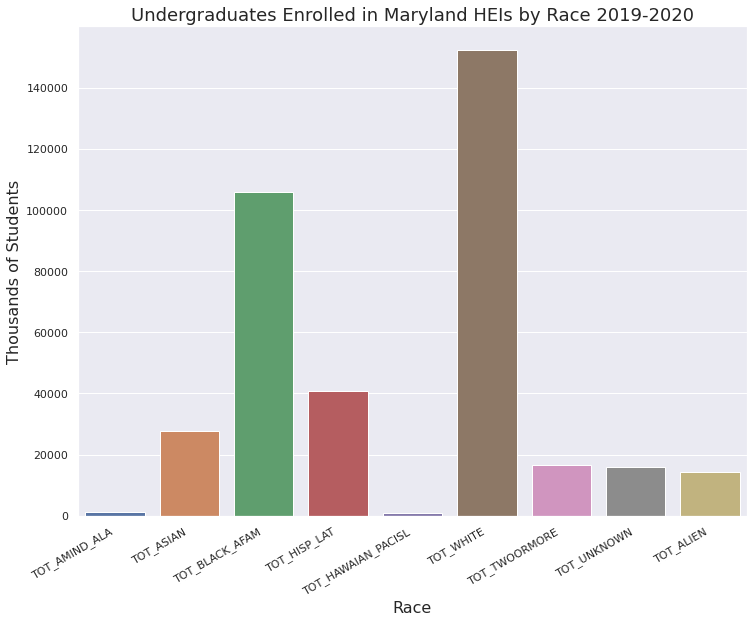

In [375]:
# DIstribution of Undergraduates Students enrolled in HEIs in Maryland by Race

sns.set_theme(style="whitegrid")



# sns.set.figsize(12,9)
sns.set(rc = {'figure.figsize':(12,9)})

ax = sns.barplot(data=df_effy_merged_by_State1.loc[['MD'],:])
plt.xticks(rotation=30, horizontalalignment="right")
plt.title("Undergraduates Enrolled in Maryland HEIs by Race 2019-2020", fontsize = 18)
plt.xlabel("Race", fontsize = 16)
plt.ylabel("Thousands of Students", fontsize=16)
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/Total_Undergraduates_Enrollment_by_Race_in_MD_2020_Data.png")

In [376]:
# OBEREG

df_effy_merged_Tot_Race1=df_effy_merged[['UNITID','STABBR','OBEREG','EFYTOTLT','EFYAIANT','EFYASIAT','EFYBKAAT','EFYHISPT','EFYNHPIT','EFYWHITT','EFY2MORT','EFYUNKNT','EFYNRALT']]
df_effy_merged_by_State1a=df_effy_merged_Tot_Race1.groupby('OBEREG').sum()
df_effy_merged_by_State2=df_effy_merged_by_State1a.rename(columns={"EFYTOTLT":"TOT_UNDERGRAD",'EFYAIANT':'TOT_AMIND_ALA','EFYASIAT':'TOT_ASIAN','EFYBKAAT':'TOT_BLACK_AFAM','EFYHISPT':'TOT_HISP_LAT','EFYNHPIT':'TOT_HAWAIAN_PACISL','EFYWHITT':'TOT_WHITE','EFY2MORT':'TOT_TWOORMORE','EFYUNKNT':"TOT_UNKNOWN",'EFYNRALT':"TOT_ALIEN"},errors="raise")
#
df_effy_merged_by_State2.drop(['UNITID','TOT_UNDERGRAD'], axis =1, inplace = True)
# df_effy_merged_by_State2.head()

In [377]:
df_effy_merged_by_State2.head()

,TOT_AMIND_ALA,TOT_ASIAN,TOT_BLACK_AFAM,TOT_HISP_LAT,TOT_HAWAIAN_PACISL,TOT_WHITE,TOT_TWOORMORE,TOT_UNKNOWN,TOT_ALIEN
OBEREG,,,,,,,,,
0,68,1034,1164,1515,61,9458,977,242,184
1,3397,56061,103459,124525,1297,579171,36355,85689,47908
2,8258,224515,438291,441065,4694,1287021,85842,140834,121306
3,11556,125760,328795,311677,3527,1875268,104350,122145,84625
4,15916,53800,128665,113679,2482,988567,53193,72715,47249


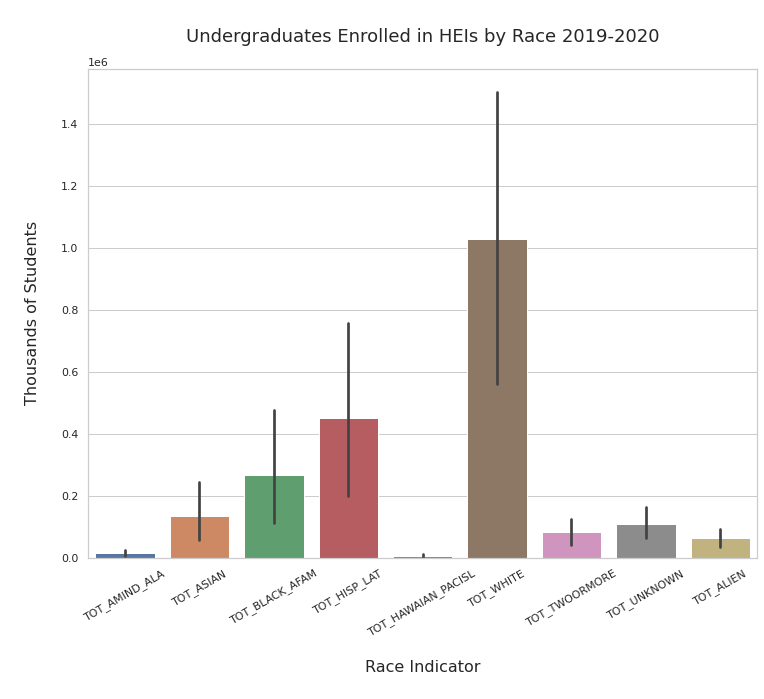

In [393]:
# 
# df_data =df_effy_merged_by_State2.sort_values()
df_data =df_effy_merged_by_State2
sns.set(rc = {'figure.figsize':(12,9)})

sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df_data)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("\nUndergraduates Enrolled in HEIs by Race 2019-2020\n", fontsize = 18)
plt.xlabel("\nRace Indicator\n", fontsize = 16)
plt.ylabel("\nThousands of Students\n", fontsize = 16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/Total_Undergraduates_Enrollment_by_Race_All_States_2020_Data.png")

In [379]:
df_effy_merged_by_State2.describe().round(decimals=2)

,TOT_AMIND_ALA,TOT_ASIAN,TOT_BLACK_AFAM,TOT_HISP_LAT,TOT_HAWAIAN_PACISL,TOT_WHITE,TOT_TWOORMORE,TOT_UNKNOWN,TOT_ALIEN
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,15029.80,136765.40,268731.80,452000.10,6735.90,1029587.80,82634.10,110018.10,65389.60
std,15316.54,165436.61,317531.89,486080.22,7179.95,787817.33,71900.76,84221.19,50588.20
min,68.00,1034.00,1164.00,1515.00,61.00,1608.00,327.00,242.00,184.00
25%,4612.25,34443.25,62612.50,129246.75,2743.25,606427.25,38535.25,72948.75,32558.75
50%,12296.50,90910.50,184369.50,252191.00,4812.00,1034752.00,69517.50,103917.00,55600.00
75%,21157.00,163573.50,329520.25,578438.00,8414.75,1271425.50,105229.75,136861.25,106987.75
max,51698.00,556143.00,1064589.00,1514668.00,25105.00,2561013.00,223245.00,277420.00,146690.00


In [380]:
df_effy_merged_by_State1.head()

,TOT_AMIND_ALA,TOT_ASIAN,TOT_BLACK_AFAM,TOT_HISP_LAT,TOT_HAWAIAN_PACISL,TOT_WHITE,TOT_TWOORMORE,TOT_UNKNOWN,TOT_ALIEN
STABBR,,,,,,,,,
AK,3782,1355,929,2430,608,17682,3018,4132,457
AL,1825,5394,78880,13070,375,188665,8880,12595,6835
AR,1154,2897,28070,12904,274,109660,7052,2087,3922
AS,0,6,0,0,1138,4,2,0,122
AZ,15993,25041,74441,183386,2870,313411,27787,76187,13219


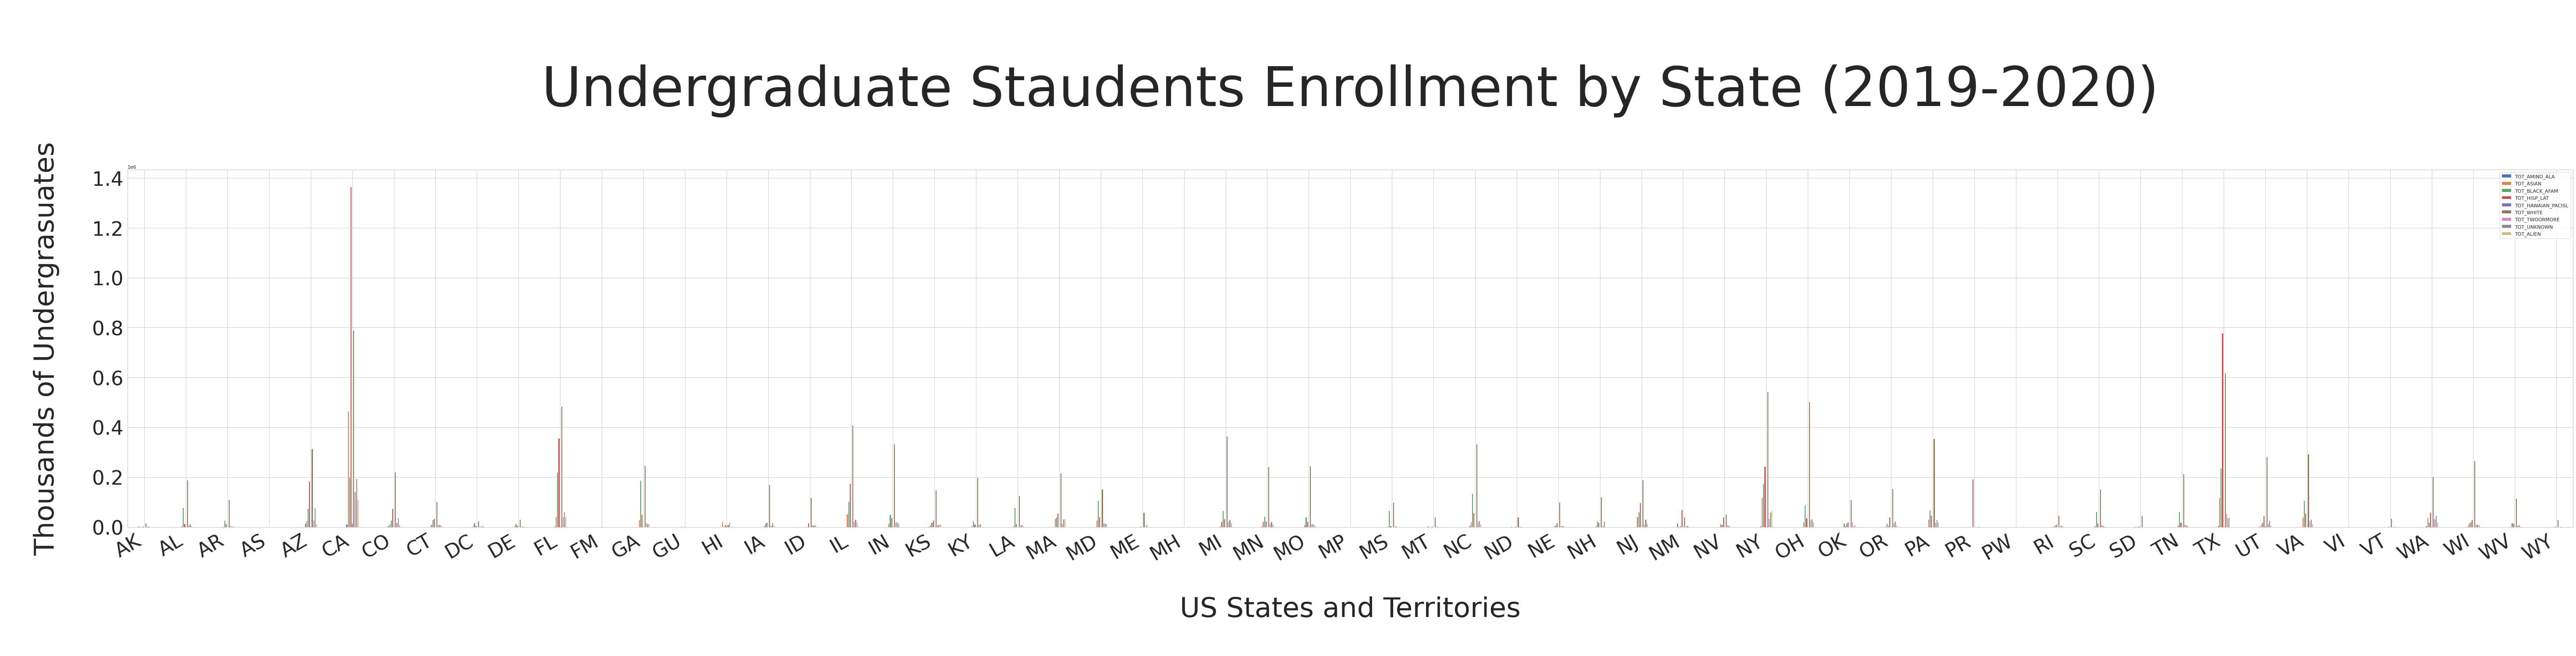

In [381]:

graph_c=df_effy_merged_by_State1.plot(kind='bar', width = 0.3, figsize=(100,15), fontsize = 45)
graph_c.set_xlabel("\nUS States and Territories\n", fontsize = 63)
graph_c.set_ylabel("\nThousands of Undergrasuates\n", fontsize=63)
graph_c.set_title("\nUndergraduate Staudents Enrollment by State (2019-2020)\n", fontsize = 124)
plt.xticks(rotation=30, horizontalalignment="right")


plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/Total_Undergraduates_Enrollment_by_State_2020_Data.png")



# We now will merge the last DF with the previous DF including Institutional identification information to bring the information pertaining to Students together with the information pertaining to the Institutions

# Our next step is to add Institutional Admissions information to this  merged DF - this will also require cleaning - we will open a new notebook for this phase 

In [382]:
df_merged.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'OBEREG', 'HLOFFER', 'GROFFER',
       'HDEGOFFR', 'HBCU', 'LOCALE', 'POSTSEC', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'LEVEL3', 'LEVEL5', 'CALSYS', 'FT_UG', 'FT_FTUG', 'PT_UG',
       'PT_FTUG', 'OPENADMP', 'VET1', 'VET2', 'CREDITS1', 'CREDITS2',
       'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'YRSCOLL',
       'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'STUSRV9',
       'LIBRES1', 'TUITPL', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4',
       'DSTNUGC', 'DSTNUGP', 'DSTNCED1', 'ALLONCAM', 'TUITVARY', 'ROOM',
       'BOARD', 'APPLFEEU', 'RMANDBRDAMT'],
      dtype='object')

In [383]:
df_effy_under1a.columns

Index(['UNITID', 'EFYTOTLT', 'EFYTOTLM', 'EFYTOTLW', 'EFYAIANT', 'EFYAIANM',
       'EFYAIANW', 'EFYASIAT', 'EFYASIAM', 'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM',
       'EFYBKAAW', 'EFYHISPT', 'EFYHISPM', 'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM',
       'EFYNHPIW', 'EFYWHITT', 'EFYWHITM', 'EFYWHITW', 'EFY2MORT', 'EFY2MORM',
       'EFY2MORW', 'EFYUNKNT', 'EFYUNKNM', 'EFYUNKNW', 'EFYNRALT', 'EFYNRALM',
       'EFYNRALW'],
      dtype='object')

In [384]:
df_effy_merged.to_csv("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_student_data_merged.csv")

In [385]:
df_merged_two = pd.merge(df_merged, df_effy_under1a, left_on='UNITID', right_on='UNITID')
df_merged_two.shape

(3547, 83)

In [386]:
df_merged_two.to_csv("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_merged_two.csv")

In [387]:
df_effy_merged_by_State1.to_csv("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/separate_df_enroll_by_State_by_Race.csv")